# Exploratory Data Analysis

In [1]:
from collections import Counter
import re

import pandas as pd
from plotnine import *
import pygris

REDUCED = False

## Load Data

In [2]:
business_details_path = "../../data/clean/business_details.parquet"
photo_details_path = "../../data/clean/photo_details.parquet"

if REDUCED:
    business_details_path = "../../data/clean/reduced_business_details.parquet"
    photo_details_path = "../../data/clean/reduced_photo_details.parquet"

photo_df = pd.read_parquet(photo_details_path)
business_df = pd.read_parquet(business_details_path)

df = photo_df.merge(business_df, on="business_id", how="left")

In [3]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (200100, 54)

Columns: ['photo_id', 'business_id', 'caption', 'label', 'restaurants_delivery', 'drive_thru', 'wi_fi', 'happy_hour', 'caters', 'byobcorkage', 'restaurants_price_range2', 'good_for_meal', 'coat_check', 'city', 'smoking', 'good_for_kids', 'address', 'restaurants_take_out', 'bike_parking', 'postal_code', 'restaurants_reservations', 'noise_level', 'wheelchair_accessible', 'business_accepts_bitcoin', 'good_for_dancing', 'restaurants_table_service', 'restaurants_counter_service', 'best_nights', 'name', 'state', 'restaurants_attire', 'dietary_restrictions', 'stars', 'corkage', 'byob', 'business_parking', 'by_appointment_only', 'is_open', 'hair_specializes_in', 'open24hours', 'accepts_insurance', 'latitude', 'business_accepts_credit_cards', 'has_tv', 'music', 'alcohol', 'categories', 'dogs_allowed', 'longitude', 'restaurants_good_for_groups', 'ages_allowed', 'outdoor_seating', 'ambience', 'review_count']


,photo_id,business_id,caption,label,restaurants_delivery,drive_thru,wi_fi,happy_hour,caters,byobcorkage,...,music,alcohol,categories,dogs_allowed,longitude,restaurants_good_for_groups,ages_allowed,outdoor_seating,ambience,review_count
0,EW7J8ghM8lQVvPGdhuze3w,M-6AXSgmDMYcWsF442mzzA,Patio,outside,None,None,u'no',None,True,None,...,None,u'beer_and_wine',"Seafood, Restaurants",False,-90.194561,False,None,True,"{'touristy': False, 'hipster': False, 'romanti...",338
1,jKy9B8UlZzwgxqK-4k2xxg,enGdNBy61DeTBZC_ylEC3w,Singapore Black Pepper Chicken,food,True,None,'free',False,True,None,...,None,'full_bar',"Asian Fusion, Restaurants, Chinese, Gluten-Free",False,-82.326668,True,None,True,"{u'divey': False, u'hipster': None, u'casual':...",142
2,zPv7HseGyDgpuPBWgFbWag,9cu2p2Z925hHkWHVyrp1JQ,,food,True,False,u'free',True,True,None,...,None,u'full_bar',"Malaysian, Nightlife, Bars, Salad, Cocktail Ba...",True,-82.651594,True,None,True,"{'touristy': False, 'hipster': False, 'romanti...",1202
3,IarrfS8t6F8lmLCmhc5Yow,oIH5YWPy_g61YXM6R900Wg,Puckets - all female country singers,inside,True,None,'free',True,True,None,...,None,u'full_bar',"Southern, Grocery, Restaurants, Barbeque, Amer...",False,-86.780479,True,None,None,"{'touristy': False, 'hipster': False, 'romanti...",2746
4,UpVE2eT1a5D1-Wdqh2lu8g,68YWxuIj8mUya0Hp0hD1_Q,Shrimp po boy,food,True,None,'no',True,True,None,...,None,'full_bar',"Tapas Bars, Tapas/Small Plates, Restaurants",False,-119.813625,True,None,True,"{u'divey': False, u'hipster': True, u'casual':...",496


## Data Overview

In [4]:
# Data types and missing values
print("Data Types:")
pd.DataFrame({
    'Column': df.dtypes.index,
    'Data Type': df.dtypes.values
}).reset_index(drop=True)

Data Types:


,Column,Data Type
0,photo_id,object
1,business_id,object
2,caption,object
3,label,object
4,restaurants_delivery,object
5,drive_thru,object
6,wi_fi,object
7,happy_hour,object
8,caters,object
9,byobcorkage,object


In [5]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


photo_id                              0
business_id                           0
caption                               0
label                                 0
restaurants_delivery              16975
drive_thru                       166421
wi_fi                             29380
happy_hour                        97785
caters                            35606
byobcorkage                      189771
restaurants_price_range2          18750
good_for_meal                     62158
coat_check                       159377
city                                  0
smoking                          165222
good_for_kids                     46345
address                               0
restaurants_take_out              10944
bike_parking                      27707
postal_code                           0
restaurants_reservations          38532
noise_level                       47763
wheelchair_accessible             98307
business_accepts_bitcoin         146343
good_for_dancing                 163671


In [6]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,stars,is_open,latitude,longitude,review_count
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,3.817106,0.824313,36.035454,-88.913481,365.209445
std,0.702541,0.380555,5.749985,13.916700,732.179767
min,1.000000,0.000000,27.564457,-120.000083,5.000000
25%,3.500000,1.000000,29.957032,-90.211024,43.000000
50%,4.000000,1.000000,38.599984,-86.159395,133.000000
75%,4.500000,1.000000,39.944030,-75.622966,353.000000
max,5.000000,1.000000,53.645924,-74.682591,7568.000000


## Label Distribution

Label Distribution:
     label   count
0     food  108152
1   inside   56031
2  outside   18569
3    drink   15670
4     menu    1678


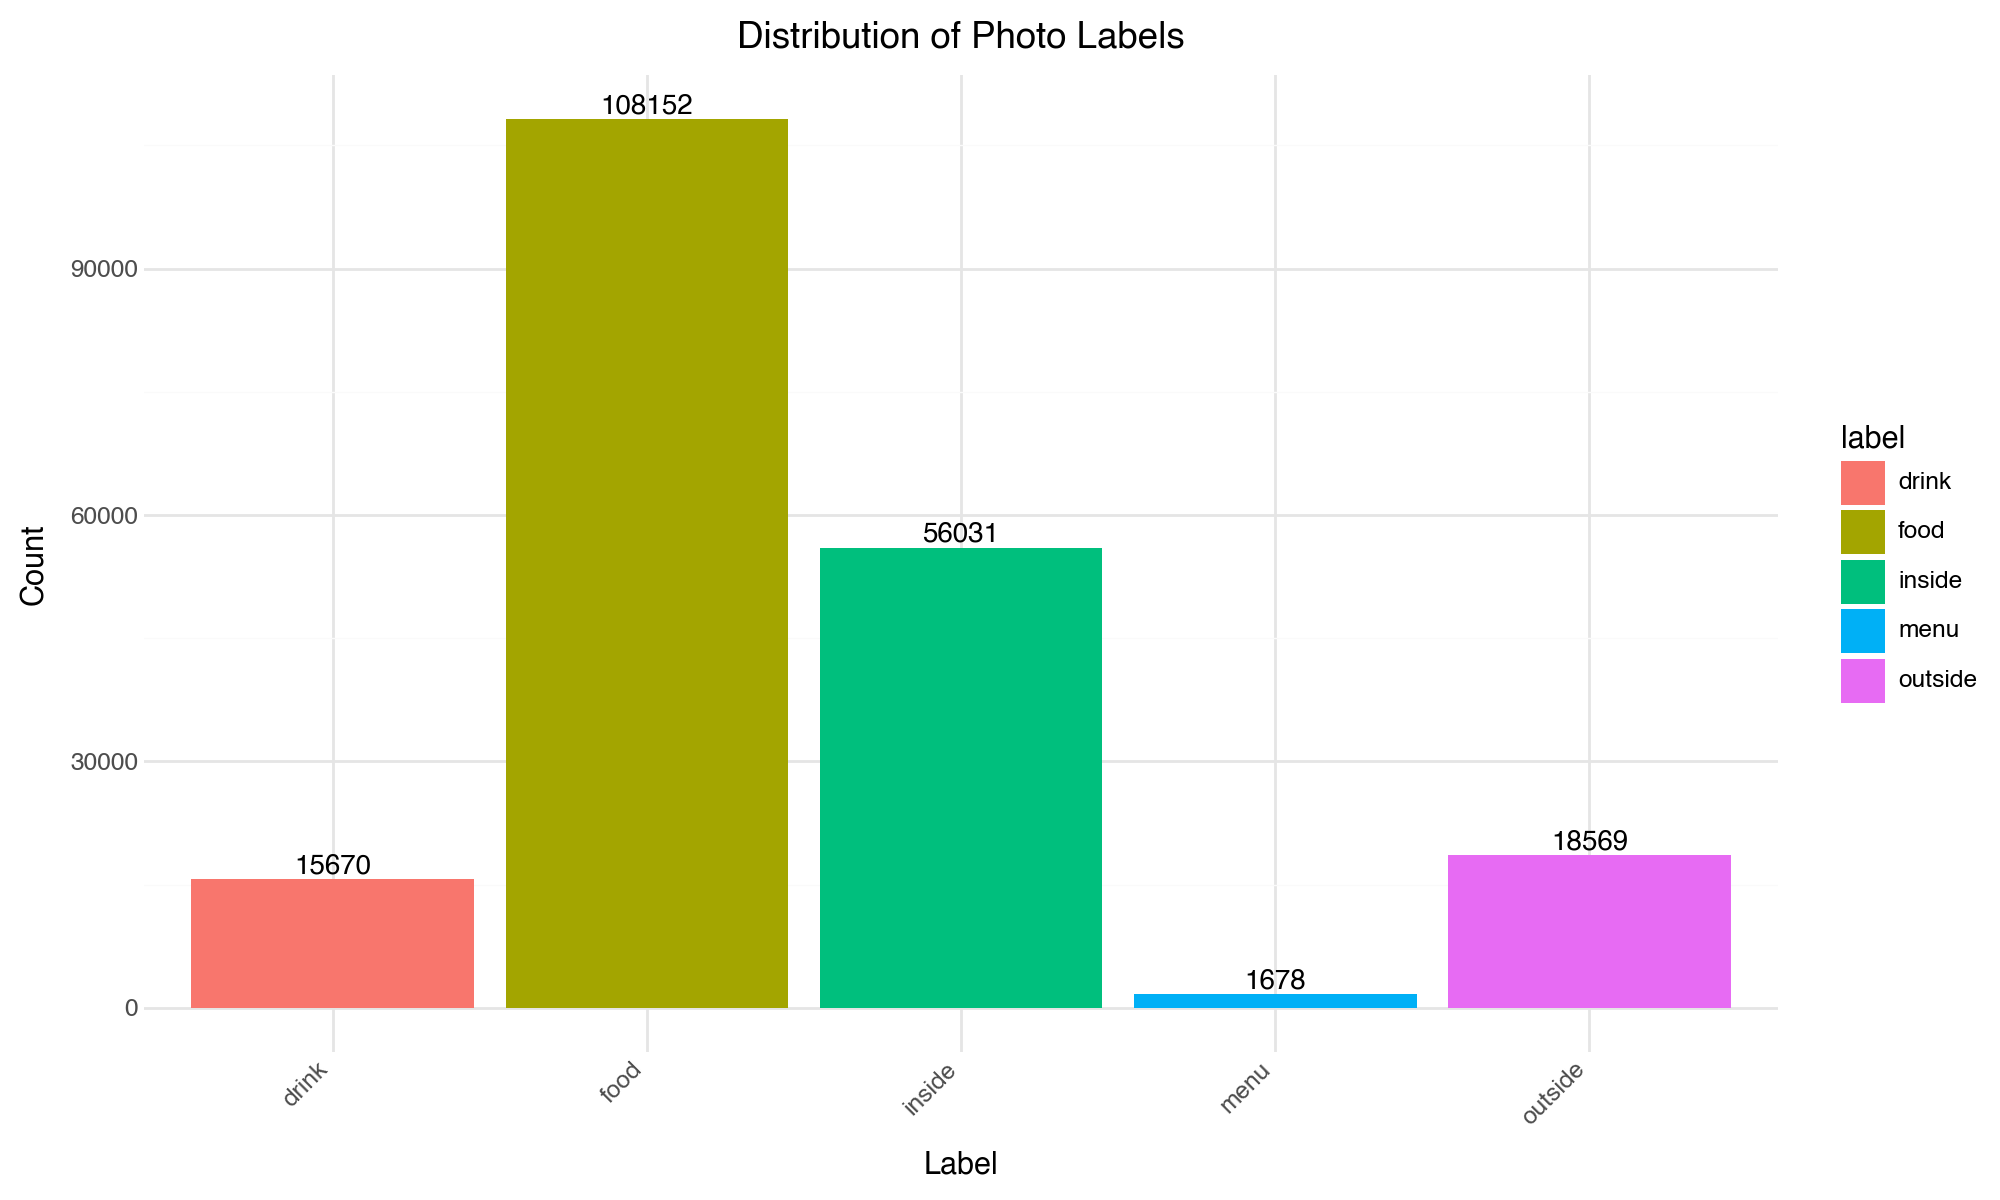

In [7]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

print("Label Distribution:")
print(label_counts)

(
    ggplot(label_counts, aes(x='label', y='count', fill='label')) +
    geom_bar(stat='identity') +
    geom_text(aes(label='count'), va='bottom', size=10) +
    labs(title='Distribution of Photo Labels', 
         x='Label', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6),
          axis_text_x=element_text(rotation=45, hjust=1))
)

## Business Rating Distribution

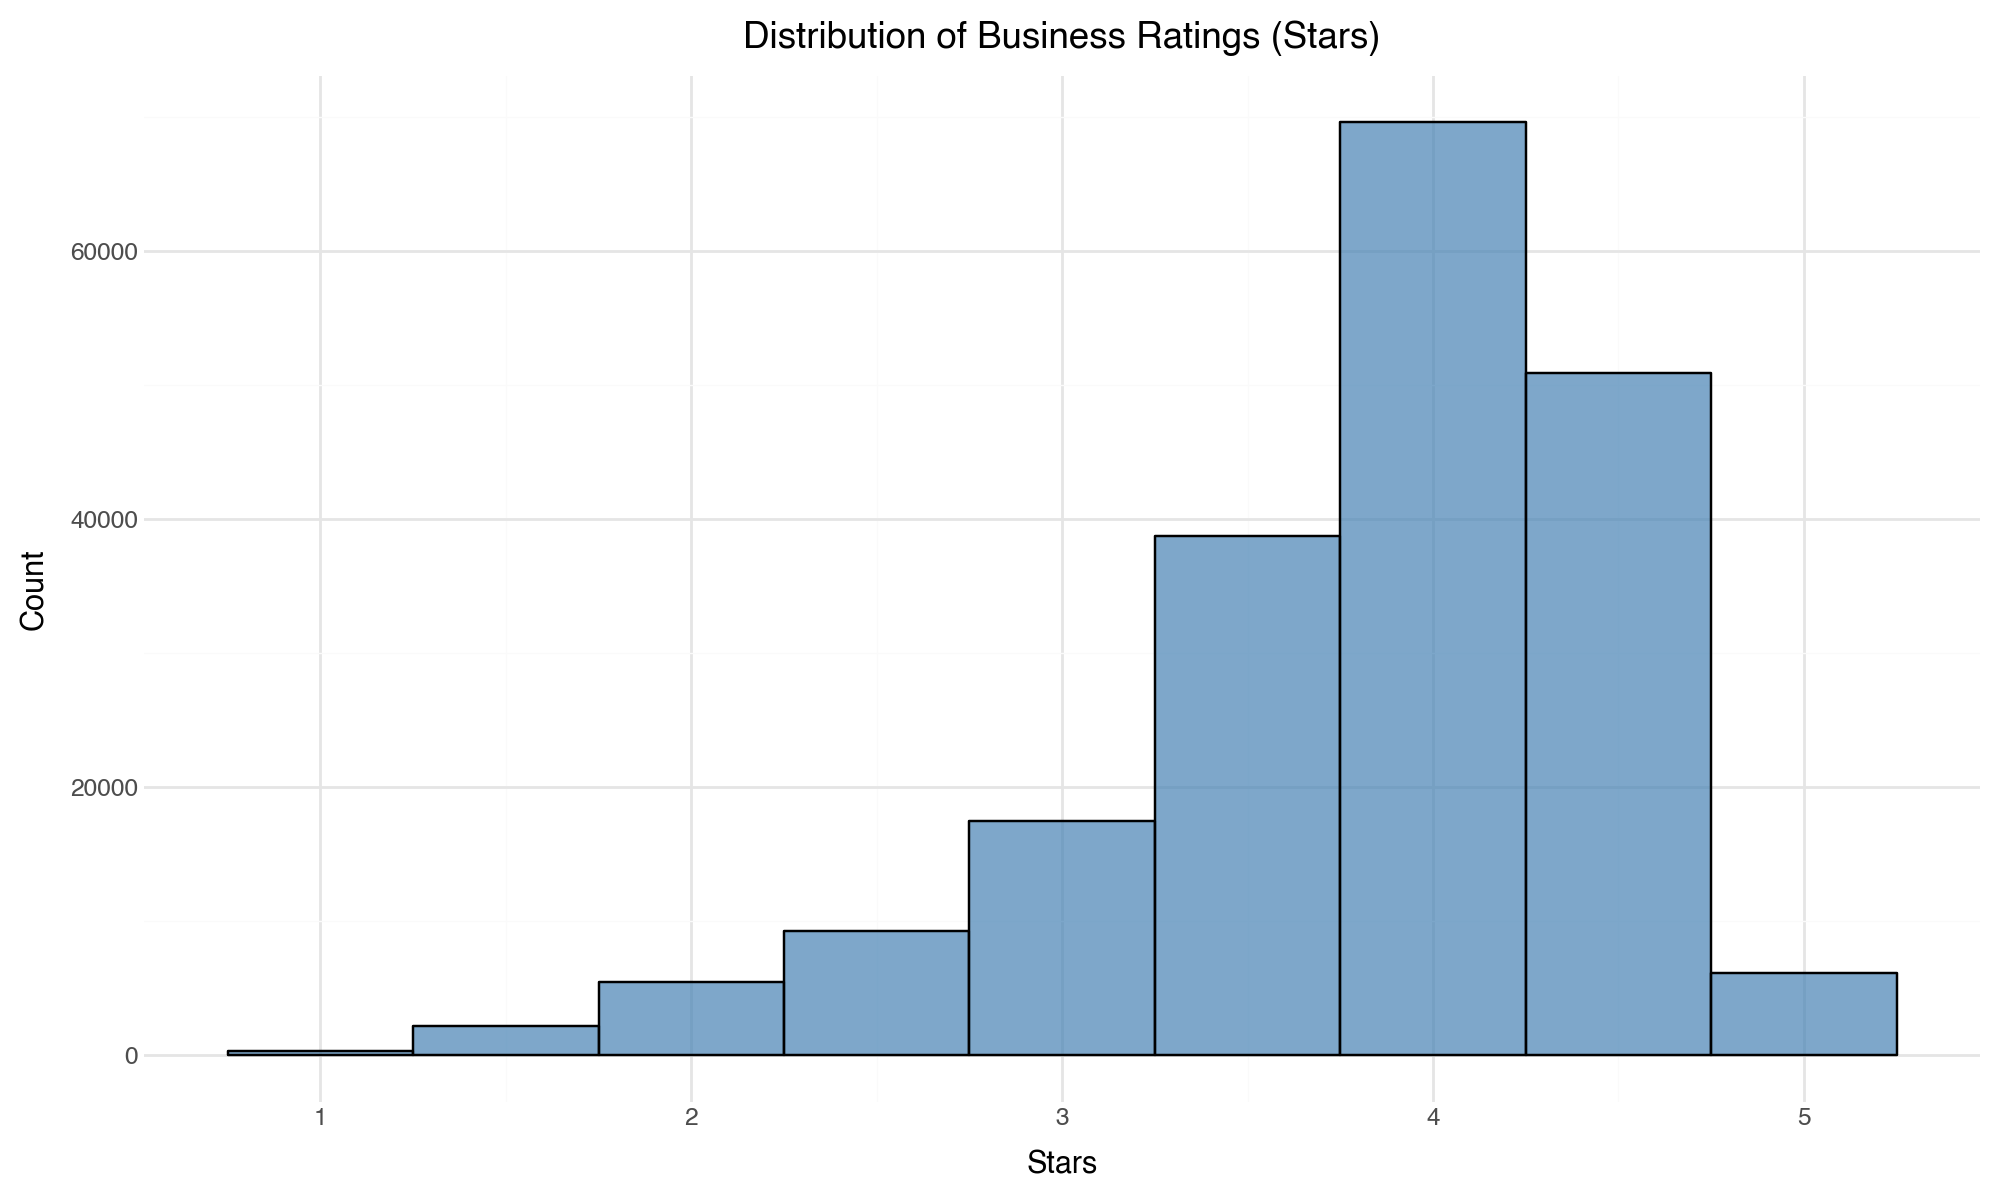

In [8]:
(
    ggplot(df, aes(x='stars')) +
    geom_histogram(binwidth=0.5, fill='steelblue', color='black', alpha=0.7) +
    labs(title='Distribution of Business Ratings (Stars)', 
         x='Stars', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

## Label Distribution by Star Rating

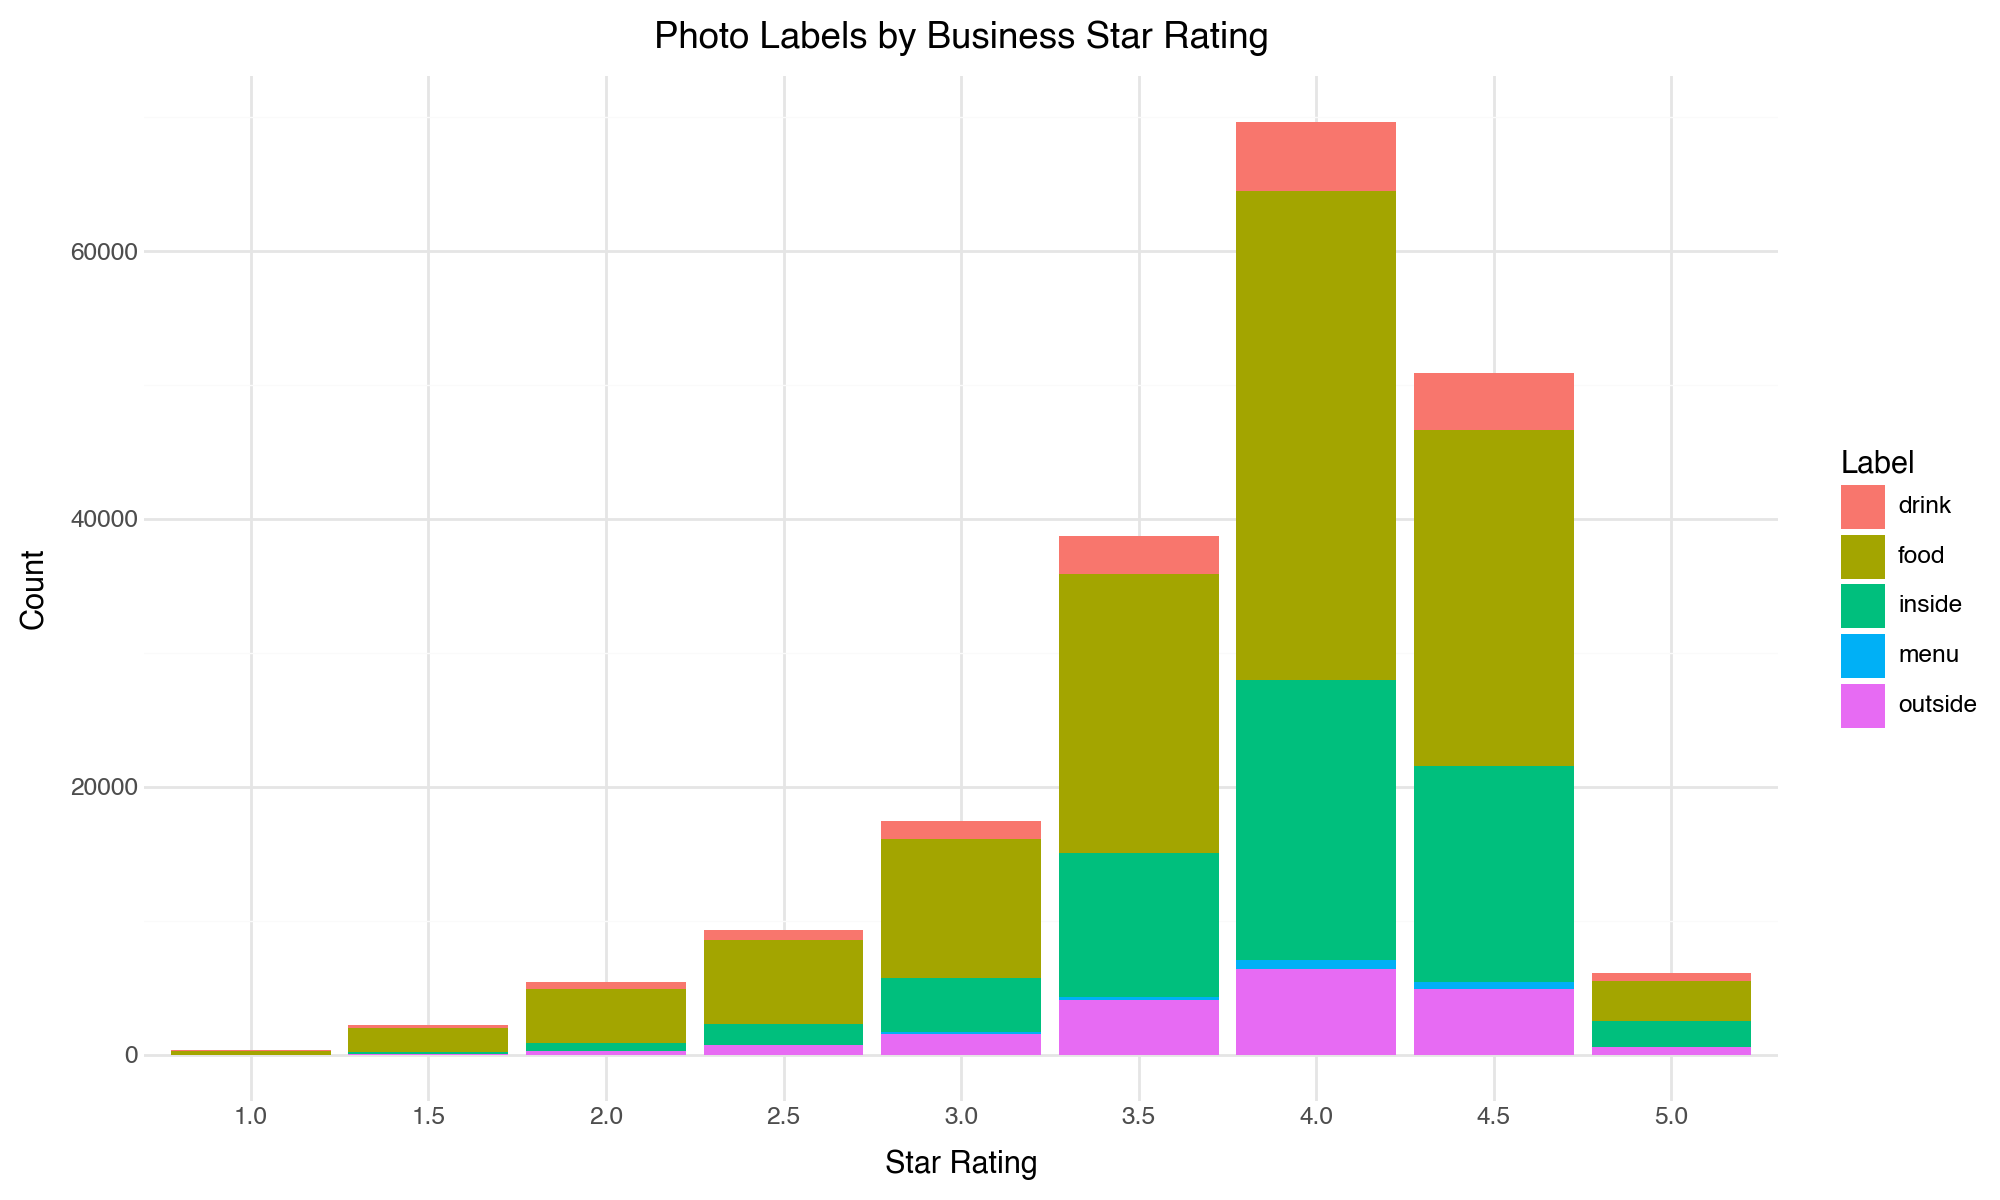

In [9]:
# Stacked bar chart: label by stars
(
    ggplot(df, aes(x='factor(stars)', fill='label')) +
    geom_bar(position='stack') +
    labs(title='Photo Labels by Business Star Rating', 
         x='Star Rating', 
         y='Count',
         fill='Label') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

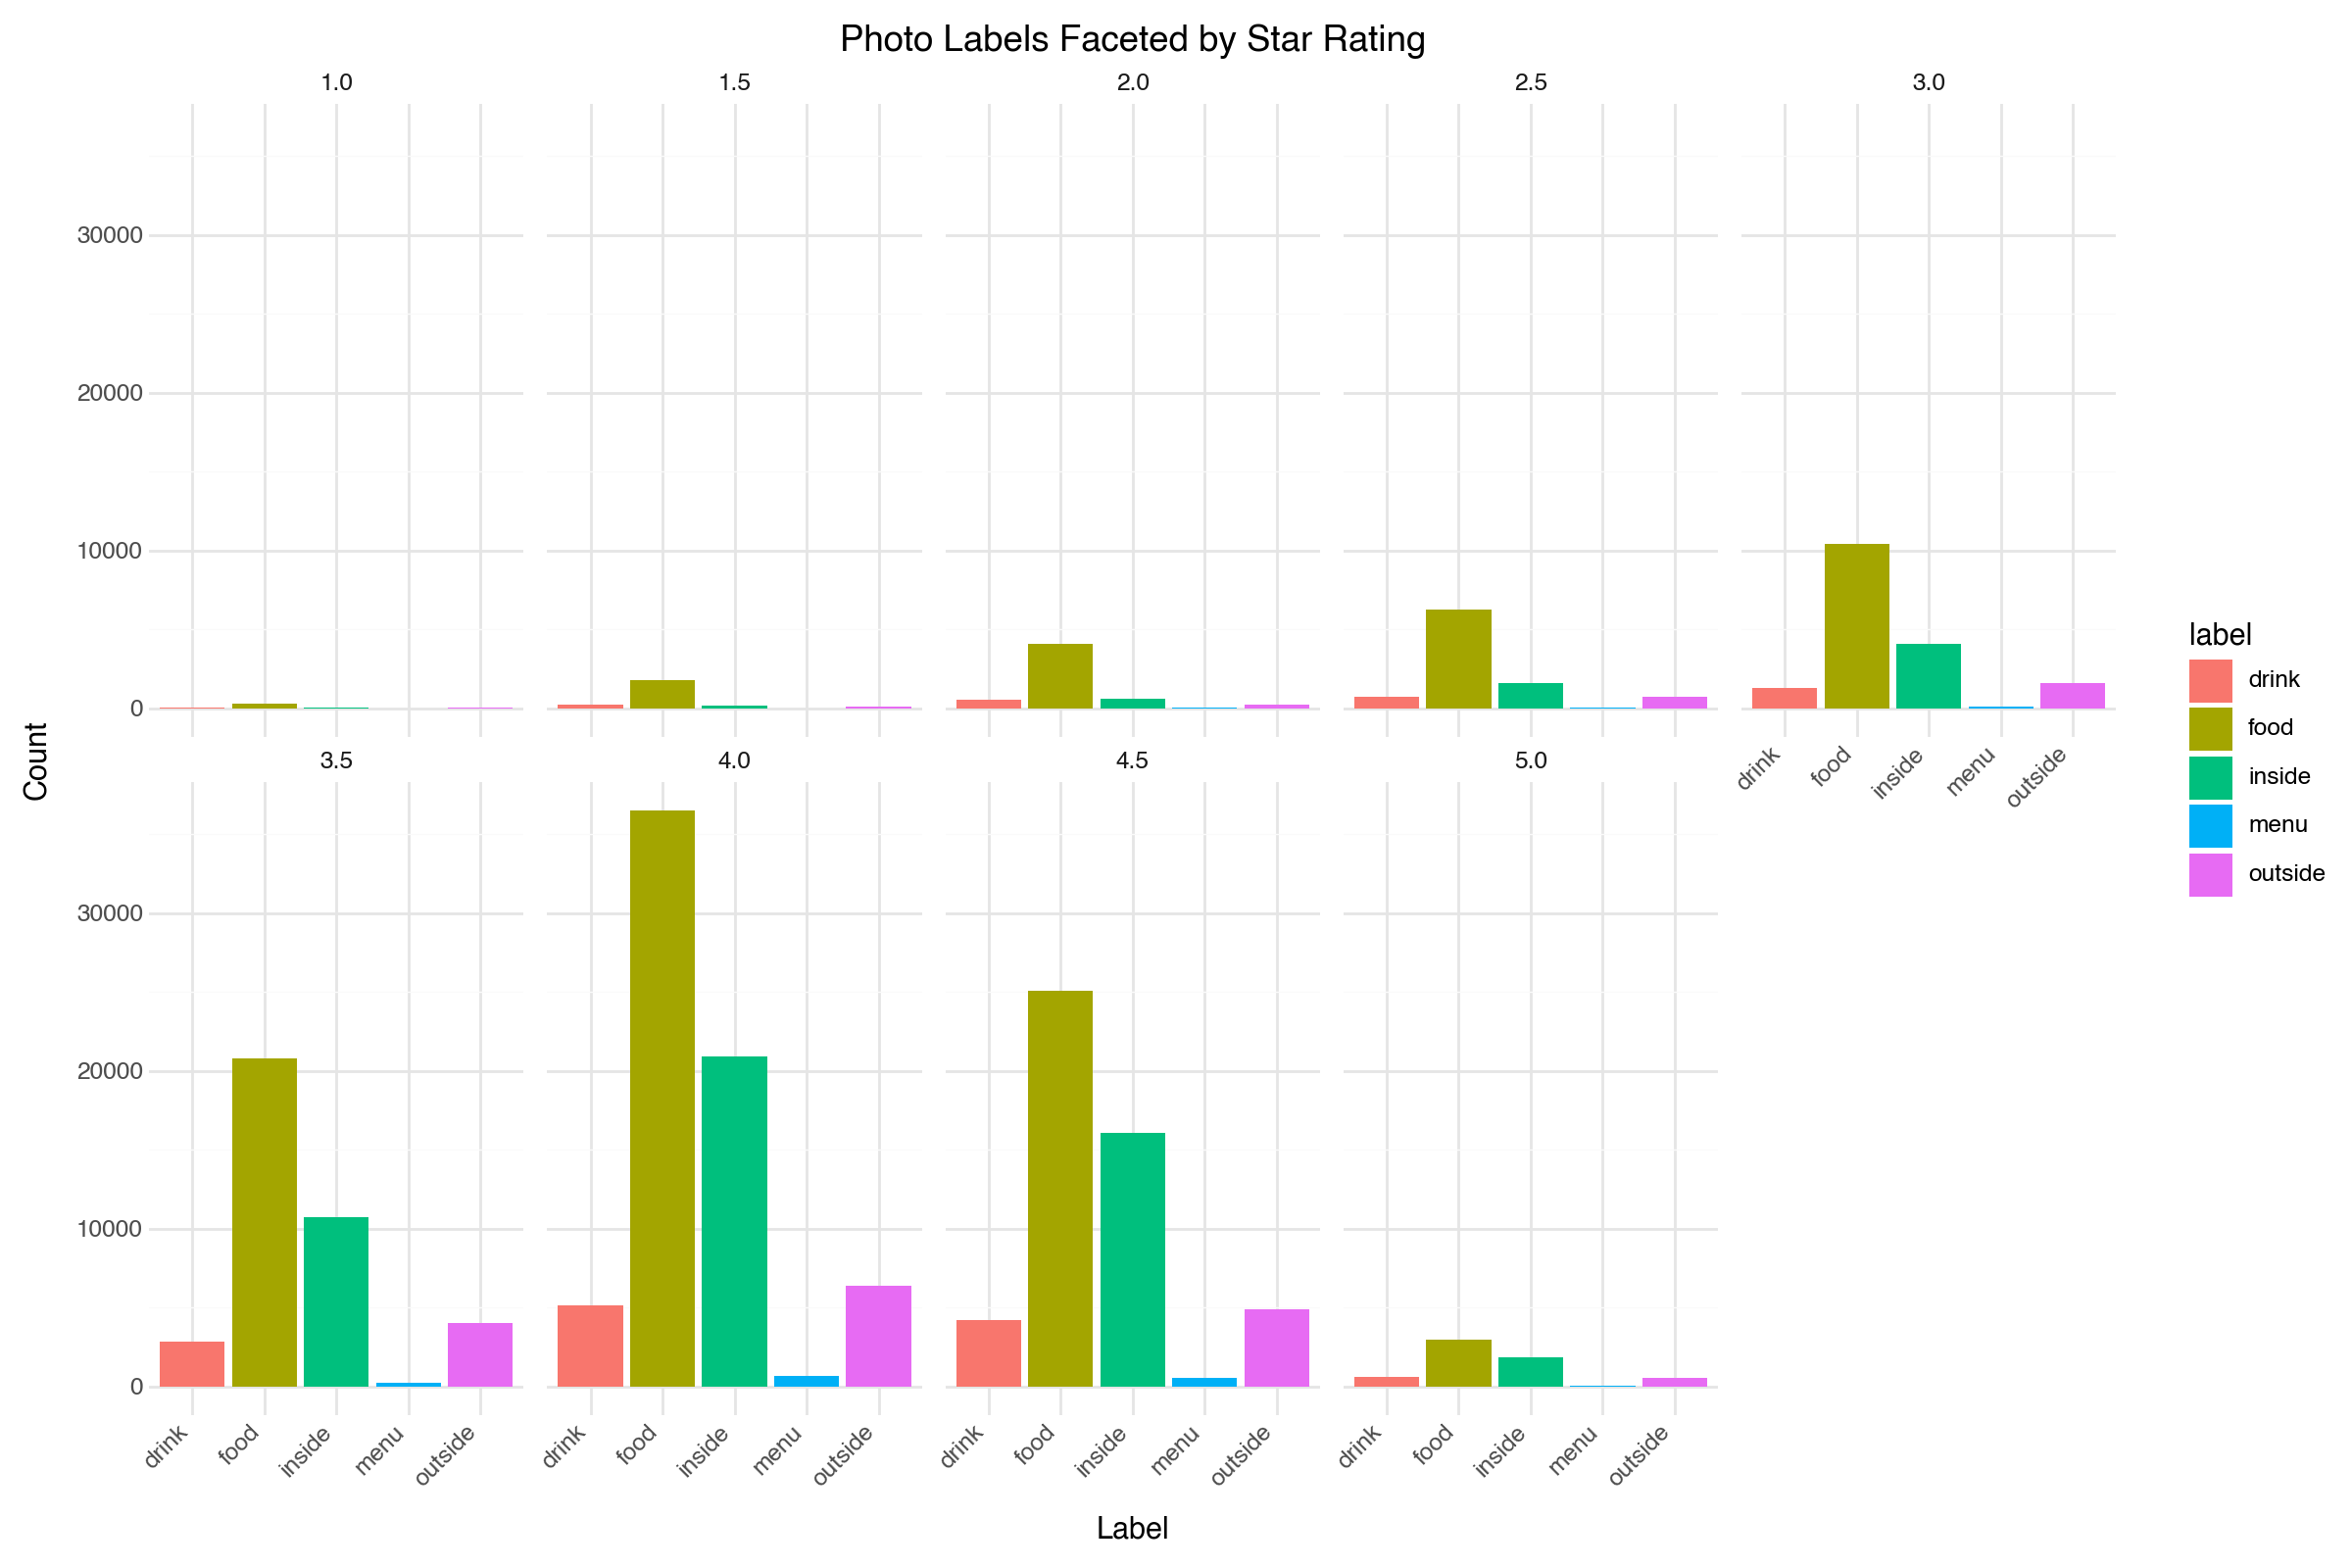

In [10]:
# Faceted bar chart: label distribution across different star ratings
(
    ggplot(df, aes(x='label', fill='label')) +
    geom_bar() +
    facet_wrap('~stars', nrow=2) +
    labs(title='Photo Labels Faceted by Star Rating', 
         x='Label', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(12, 8),
          axis_text_x=element_text(rotation=45, hjust=1))
)

## Geographic Distribution

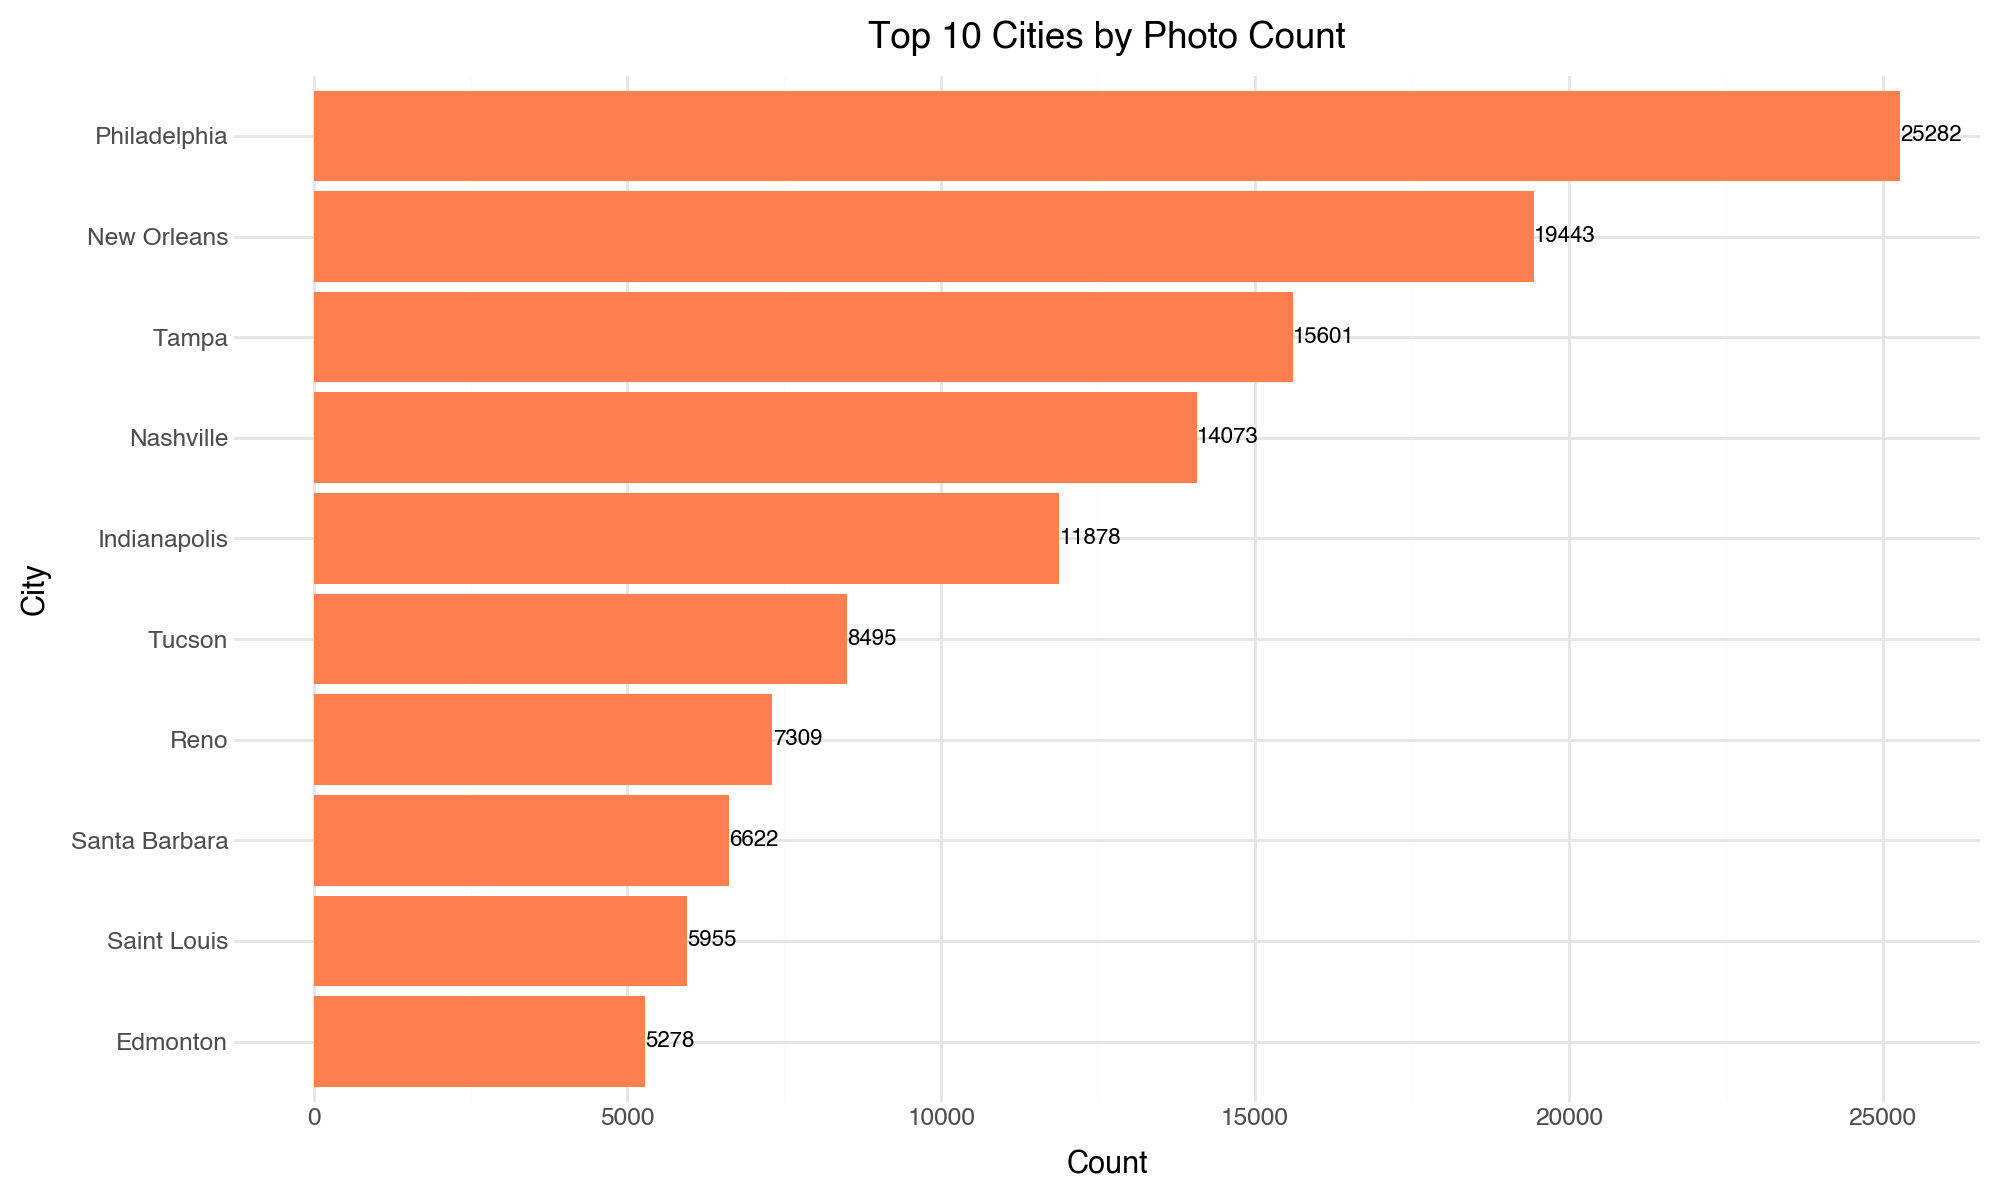

In [25]:
# Top cities by photo count
city_counts = df['city'].value_counts().head(10).reset_index()
city_counts.columns = ['city', 'count']

(
    ggplot(city_counts, aes(x='reorder(city, count)', y='count')) +
    geom_bar(stat='identity', fill='coral') +
    coord_flip() +
    geom_text(aes(label='count'), ha='left', nudge_y=5, size=8) +
    labs(title='Top 10 Cities by Photo Count', 
         x='City', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

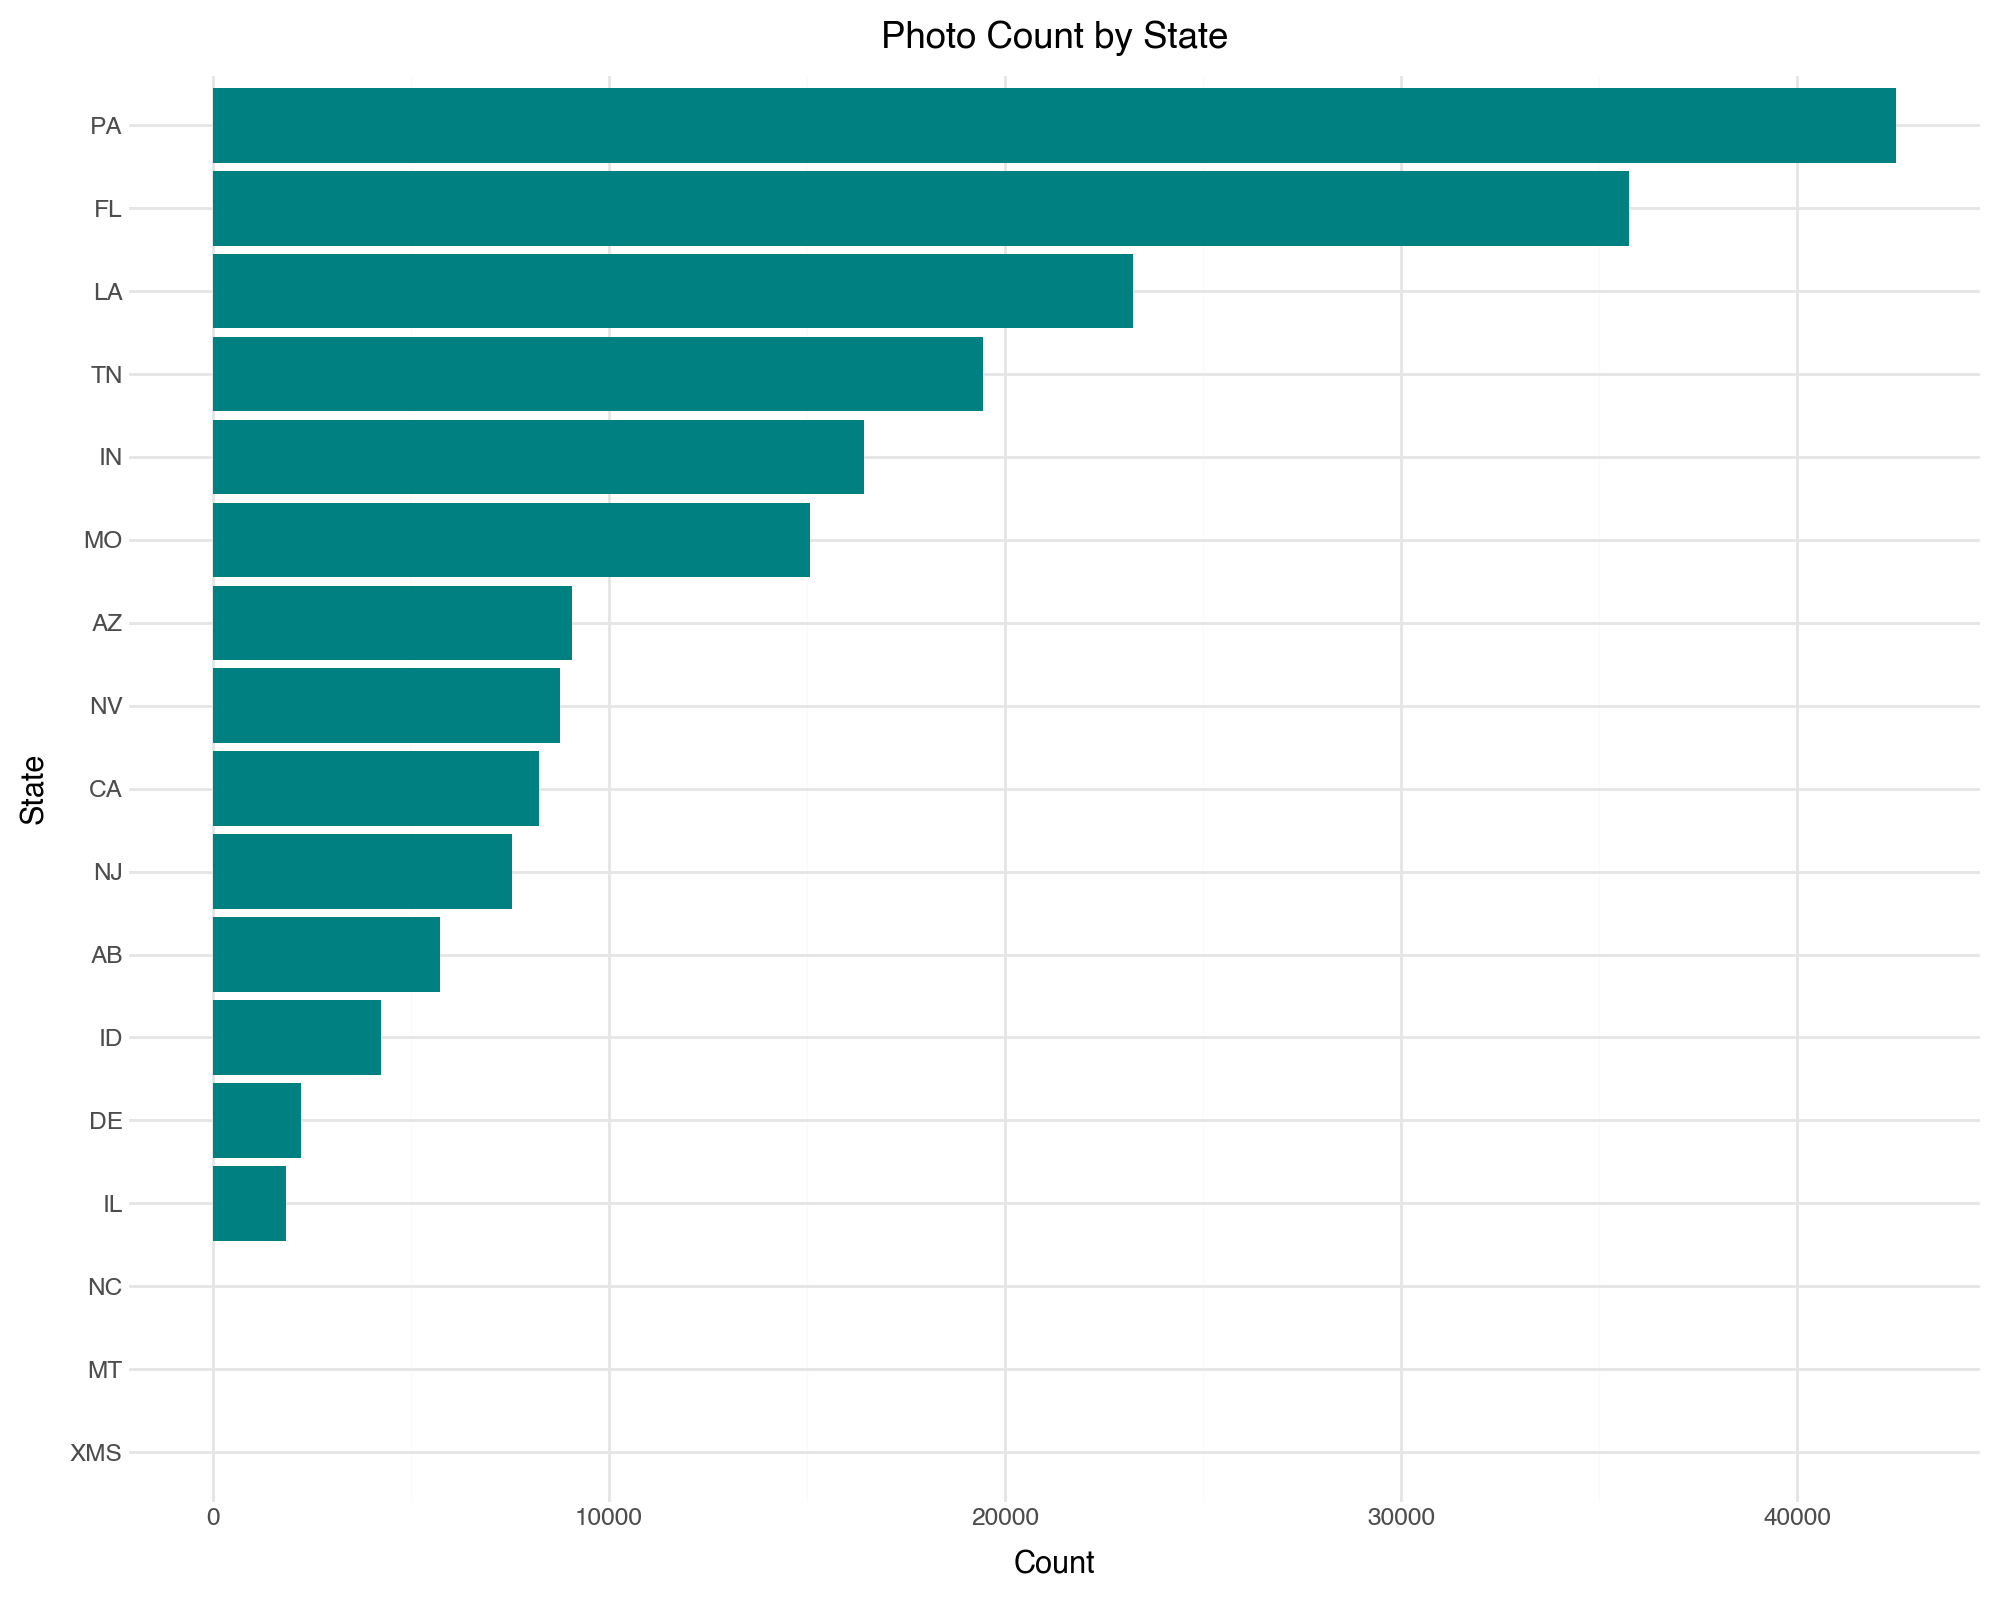

In [12]:
# State distribution
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

(
    ggplot(state_counts, aes(x='reorder(state, count)', y='count')) +
    geom_bar(stat='identity', fill='teal') +
    coord_flip() +
    labs(title='Photo Count by State', 
         x='State', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 8))
)

In [13]:
us_states_gdf = pygris.states(year=2023, resolution="5m")
us_states_gdf = us_states_gdf.to_crs(epsg=4326)

# Exclude Alaska, Hawaii, and territories for a better map
exclude_states = ['AK', 'HI', 'PR', 'VI', 'GU', 'MP', 'AS']
us_states_gdf = us_states_gdf[~us_states_gdf['STUSPS'].isin(exclude_states)]

print(f"Number of states: {len(us_states_gdf)}")

Number of states: 49


In [14]:
# Convert geodataframe to format usable by plotnine
map_data = []
for idx, row in us_states_gdf.iterrows():
    geom = row.geometry
    if geom.geom_type == 'Polygon':
        coords = list(geom.exterior.coords)
        for i, (lon, lat) in enumerate(coords):
            map_data.append({'long': lon, 'lat': lat, 'group': idx, 'order': i})
    elif geom.geom_type == 'MultiPolygon':
        for poly_idx, poly in enumerate(geom.geoms):
            coords = list(poly.exterior.coords)
            for i, (lon, lat) in enumerate(coords):
                map_data.append({'long': lon, 'lat': lat, 'group': f"{idx}_{poly_idx}", 'order': i})

map_df = pd.DataFrame(map_data)
print(f"Map dataframe shape: {map_df.shape}")

Map dataframe shape: (79099, 4)


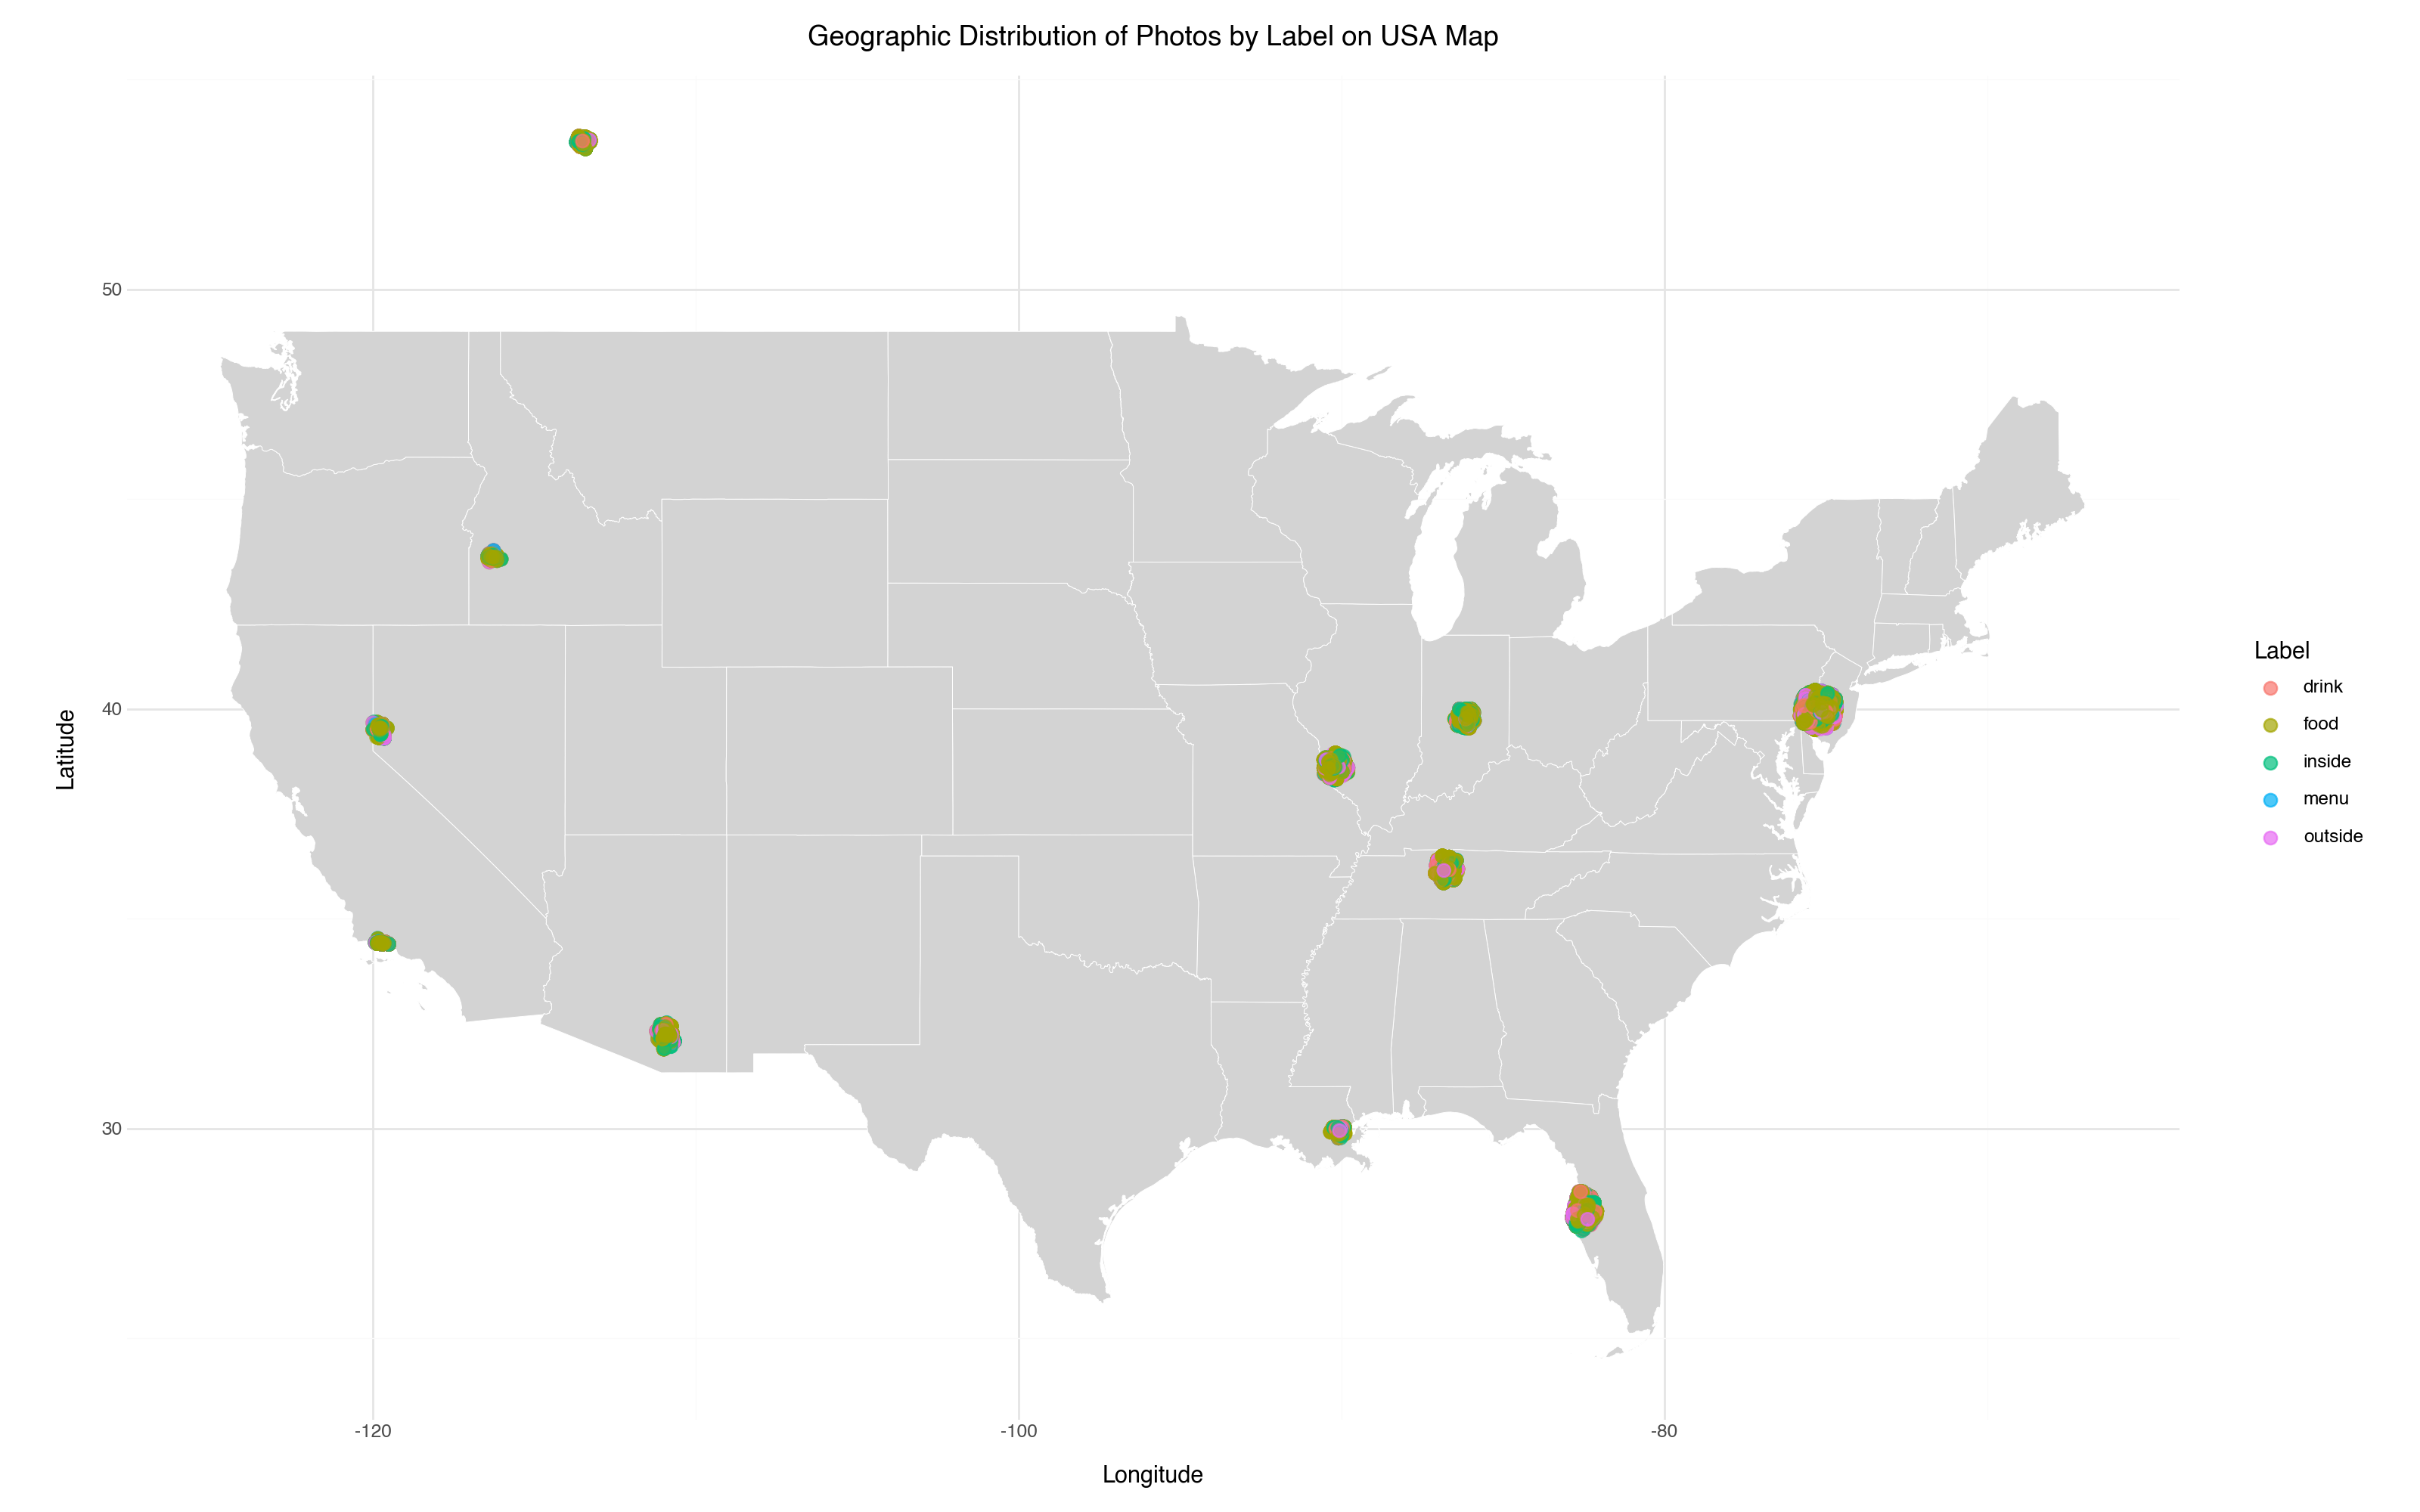

In [15]:
# Plot USA map with photo locations
(
    ggplot() +
    geom_polygon(map_df, aes(x='long', y='lat', group='group'),
                 fill='lightgray', color='white', size=0.2) +
    geom_point(df, aes(x='longitude', y='latitude', color='label'),
               alpha=0.7, size=3) +
    coord_fixed(ratio=1.3) +
    labs(title='Geographic Distribution of Photos by Label on USA Map',
         x='Longitude',
         y='Latitude',
         color='Label') +
    theme_minimal() +
    theme(figure_size=(16, 10))
)

## Review Count Analysis

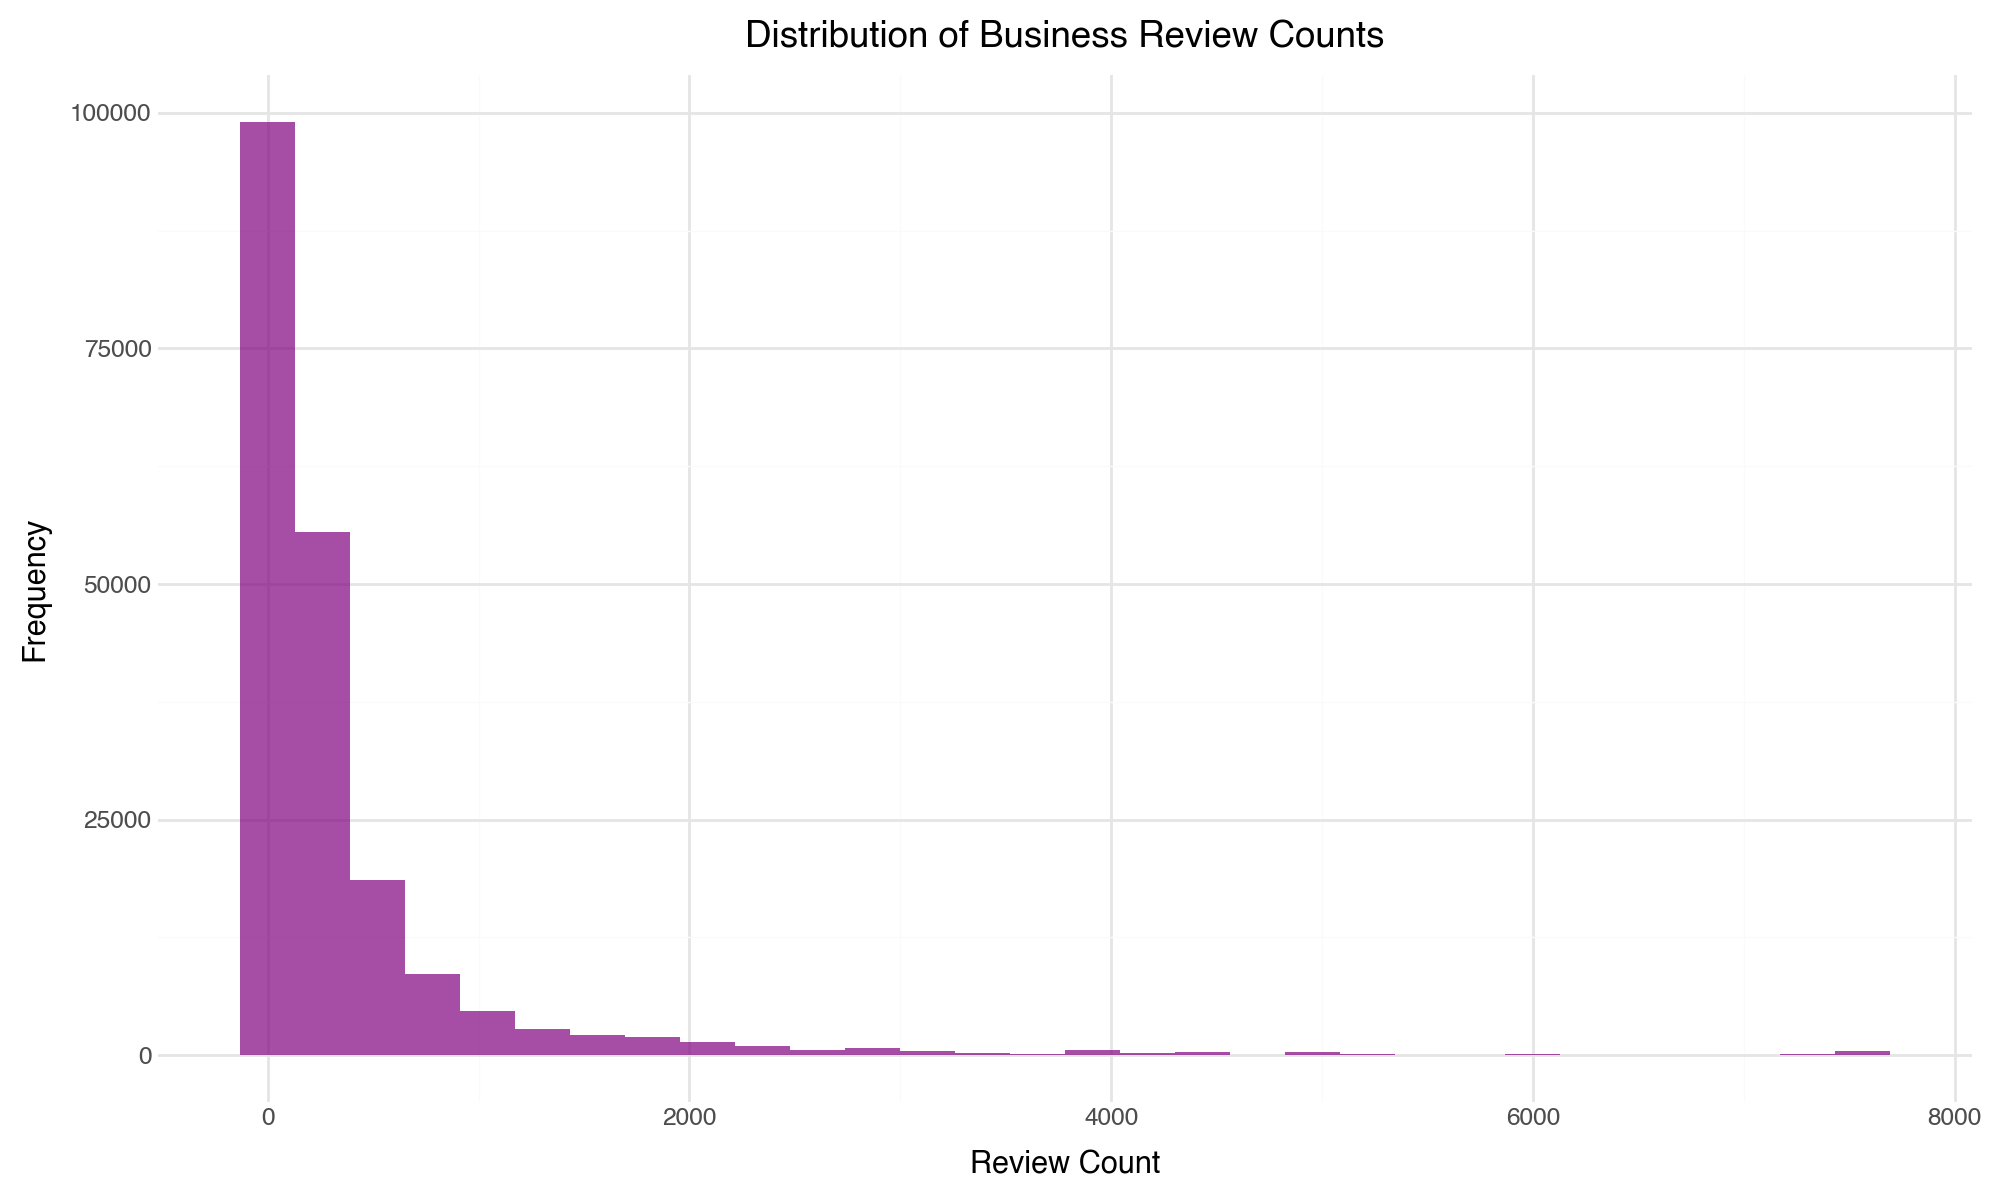

In [16]:
(
    ggplot(df, aes(x='review_count')) +
    geom_histogram(bins=30, fill='purple', alpha=0.7) +
    labs(title='Distribution of Business Review Counts', 
         x='Review Count', 
         y='Frequency') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

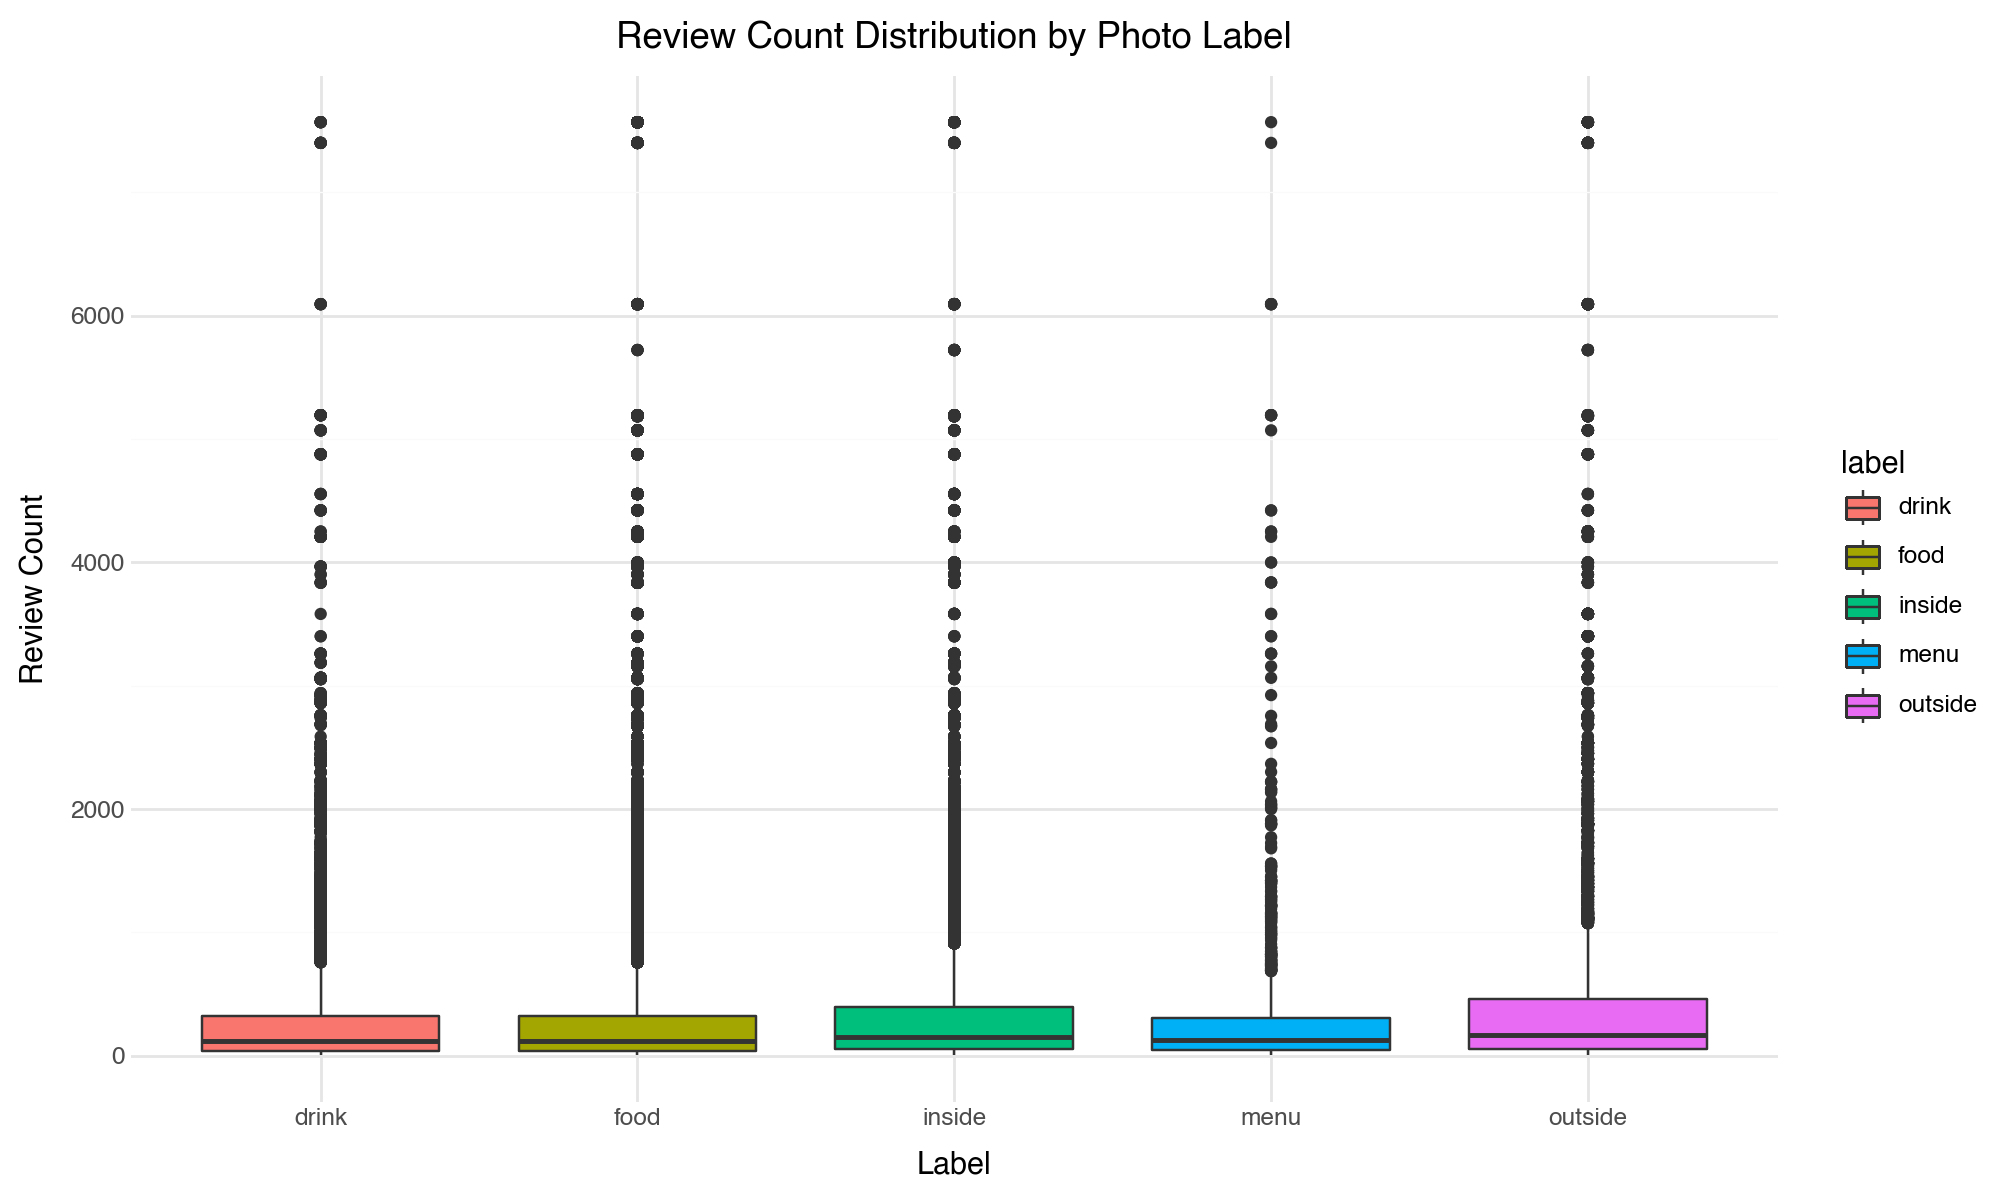

In [17]:
(
    ggplot(df, aes(x='label', y='review_count', fill='label')) +
    geom_boxplot() +
    labs(title='Review Count Distribution by Photo Label', 
         x='Label', 
         y='Review Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

## Caption Analysis

In [18]:
df['has_caption'] = df['caption'].notna() & (df['caption'].str.strip() != '')

caption_stats = df.groupby('has_caption').size().reset_index(name='count')
caption_stats['has_caption'] = caption_stats['has_caption'].map({True: 'With Caption', False: 'No Caption'})

print("Caption Availability:")
print(caption_stats)
print(f"\nPercentage with captions: {(df['has_caption'].sum() / len(df) * 100):.1f}%")

Caption Availability:
    has_caption   count
0    No Caption  103366
1  With Caption   96734

Percentage with captions: 48.3%


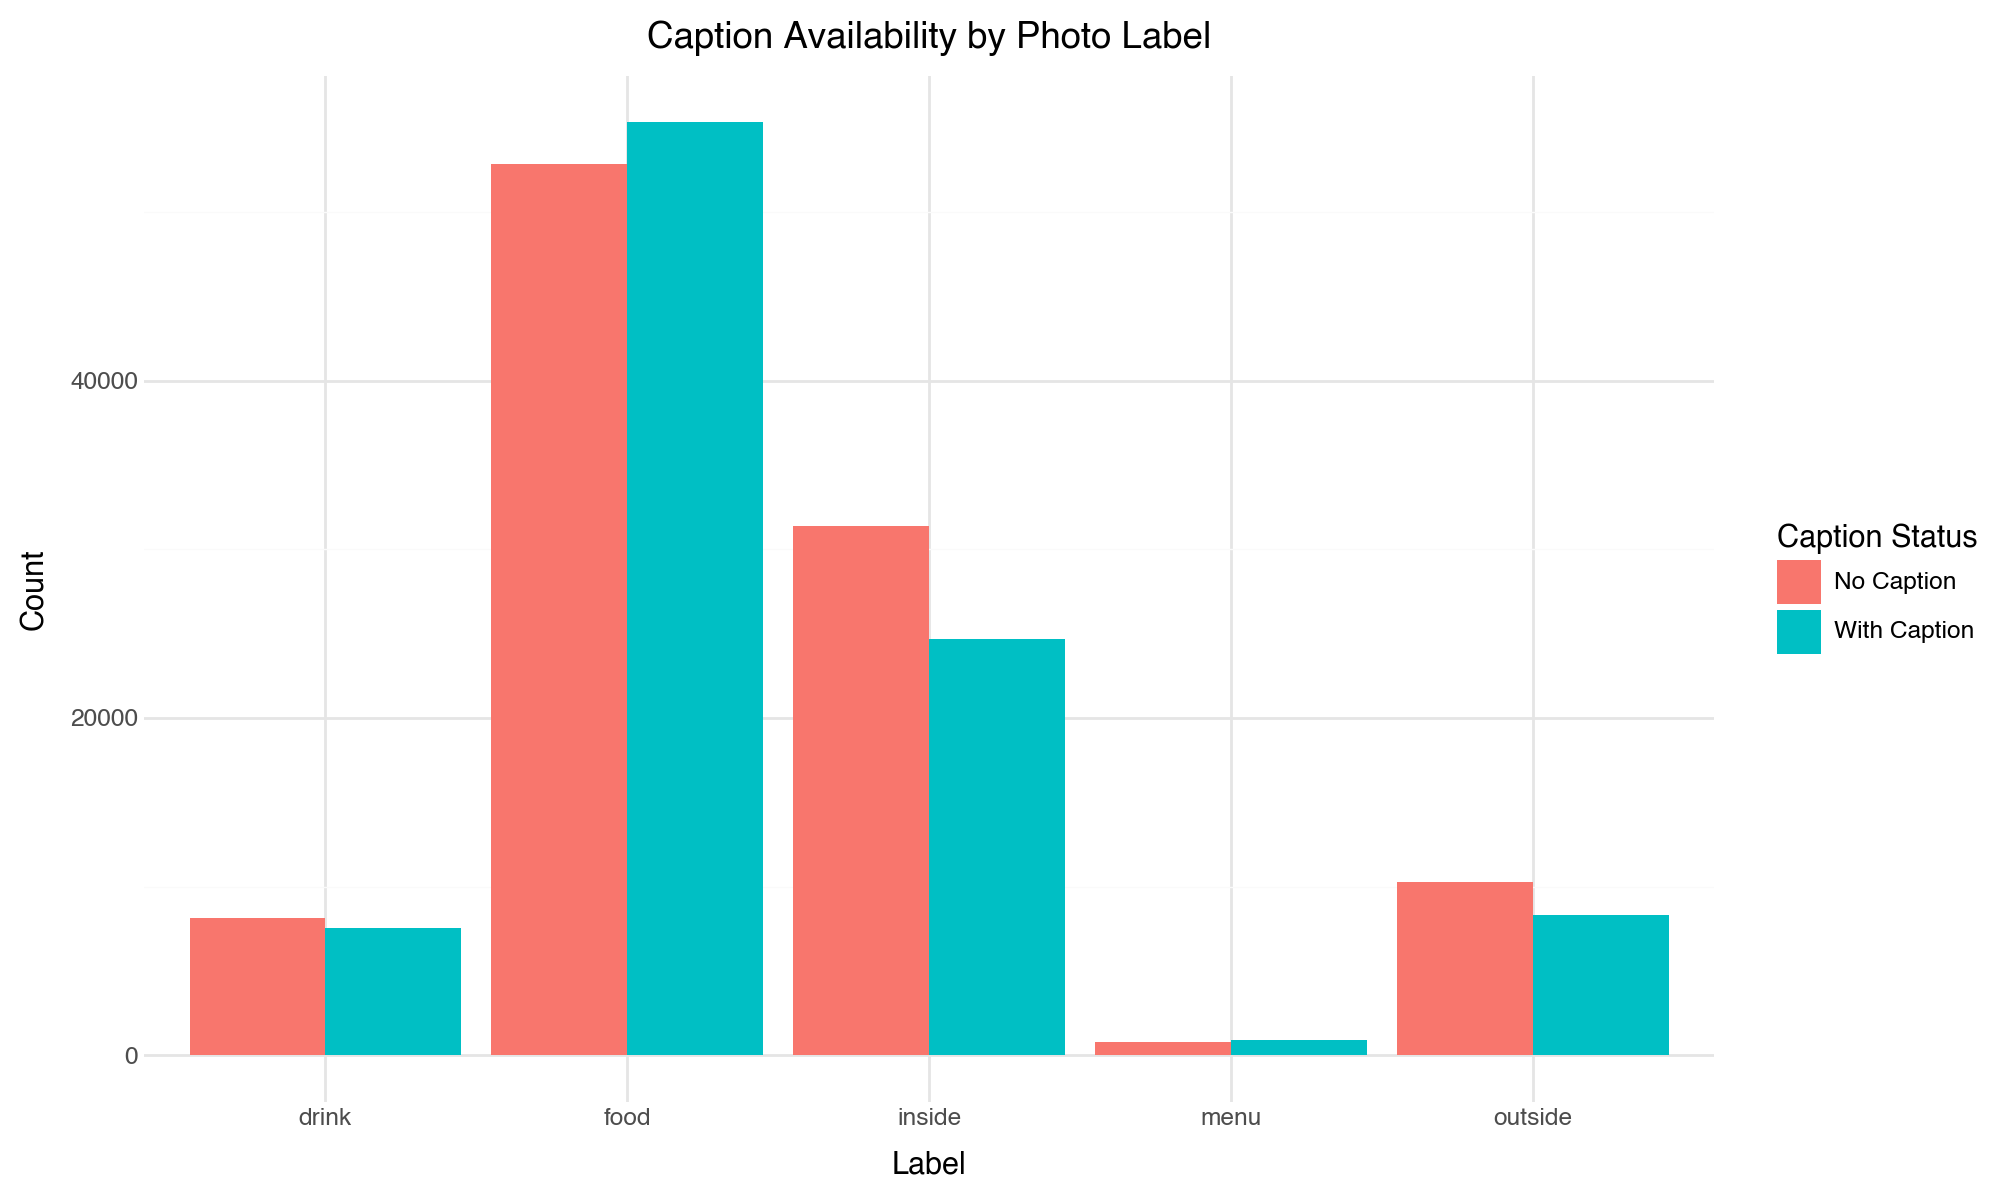

In [19]:
caption_by_label = df.groupby(['label', 'has_caption']).size().reset_index(name='count')
caption_by_label['has_caption'] = caption_by_label['has_caption'].map({True: 'With Caption', False: 'No Caption'})

(
    ggplot(caption_by_label, aes(x='label', y='count', fill='has_caption')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Caption Availability by Photo Label', 
         x='Label', 
         y='Count',
         fill='Caption Status') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

Caption Length Statistics:
count    96734.000000
mean        31.470724
std         27.568365
min          1.000000
25%         13.000000
50%         22.000000
75%         39.000000
max        140.000000
Name: caption_length, dtype: float64

count    96734.000000
mean        31.470724
std         27.568365
min          1.000000
25%         13.000000
50%         22.000000
75%         39.000000
max        140.000000
Name: caption_length, dtype: float64


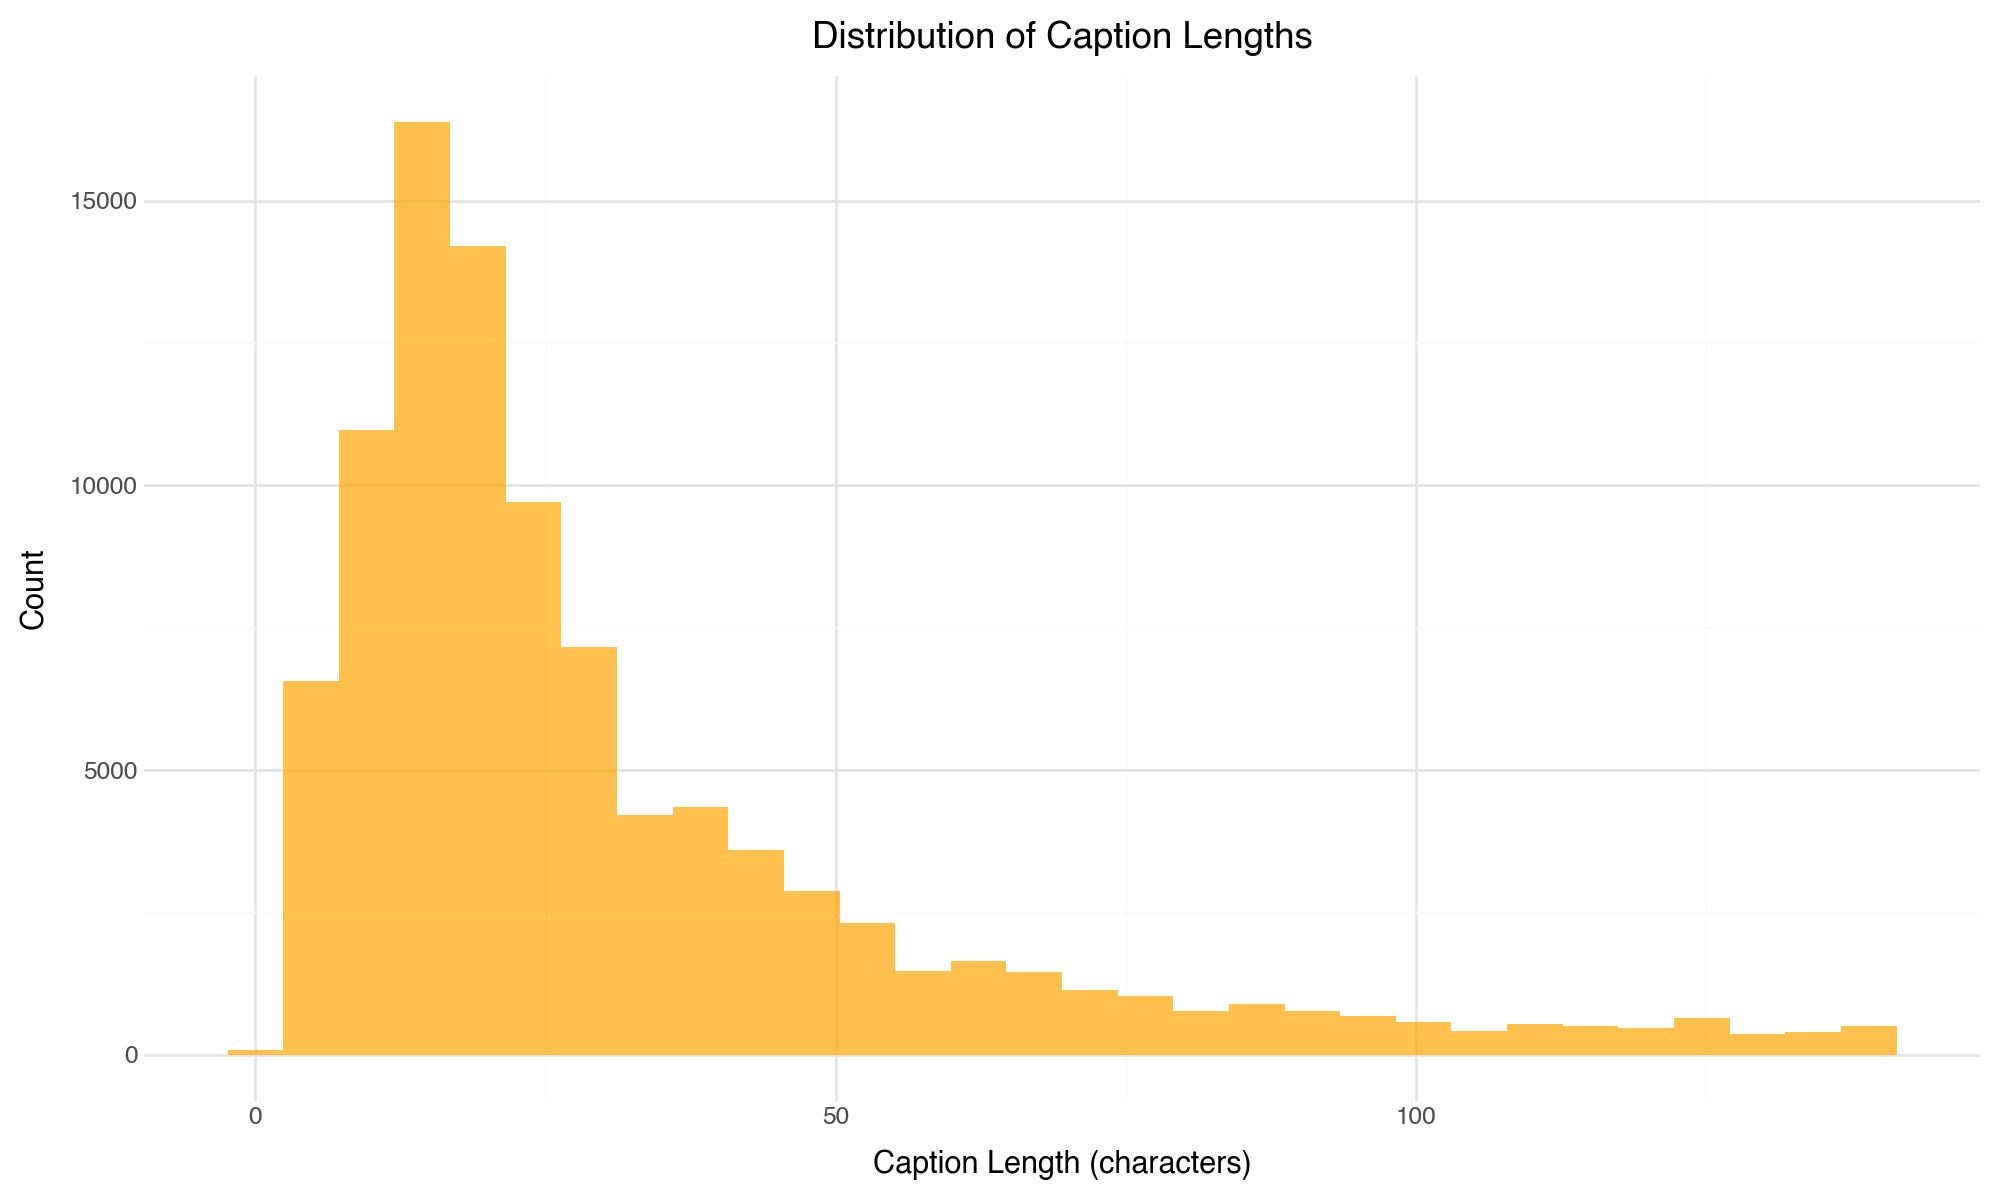

In [20]:
df_with_captions = df[df['has_caption']].copy()
df_with_captions['caption_length'] = df_with_captions['caption'].str.len()

print("Caption Length Statistics:")
print(df_with_captions['caption_length'].describe())

# Distribution of caption lengths
(
    ggplot(df_with_captions, aes(x='caption_length')) +
    geom_histogram(bins=30, fill='orange', alpha=0.7) +
    labs(title='Distribution of Caption Lengths', 
         x='Caption Length (characters)', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

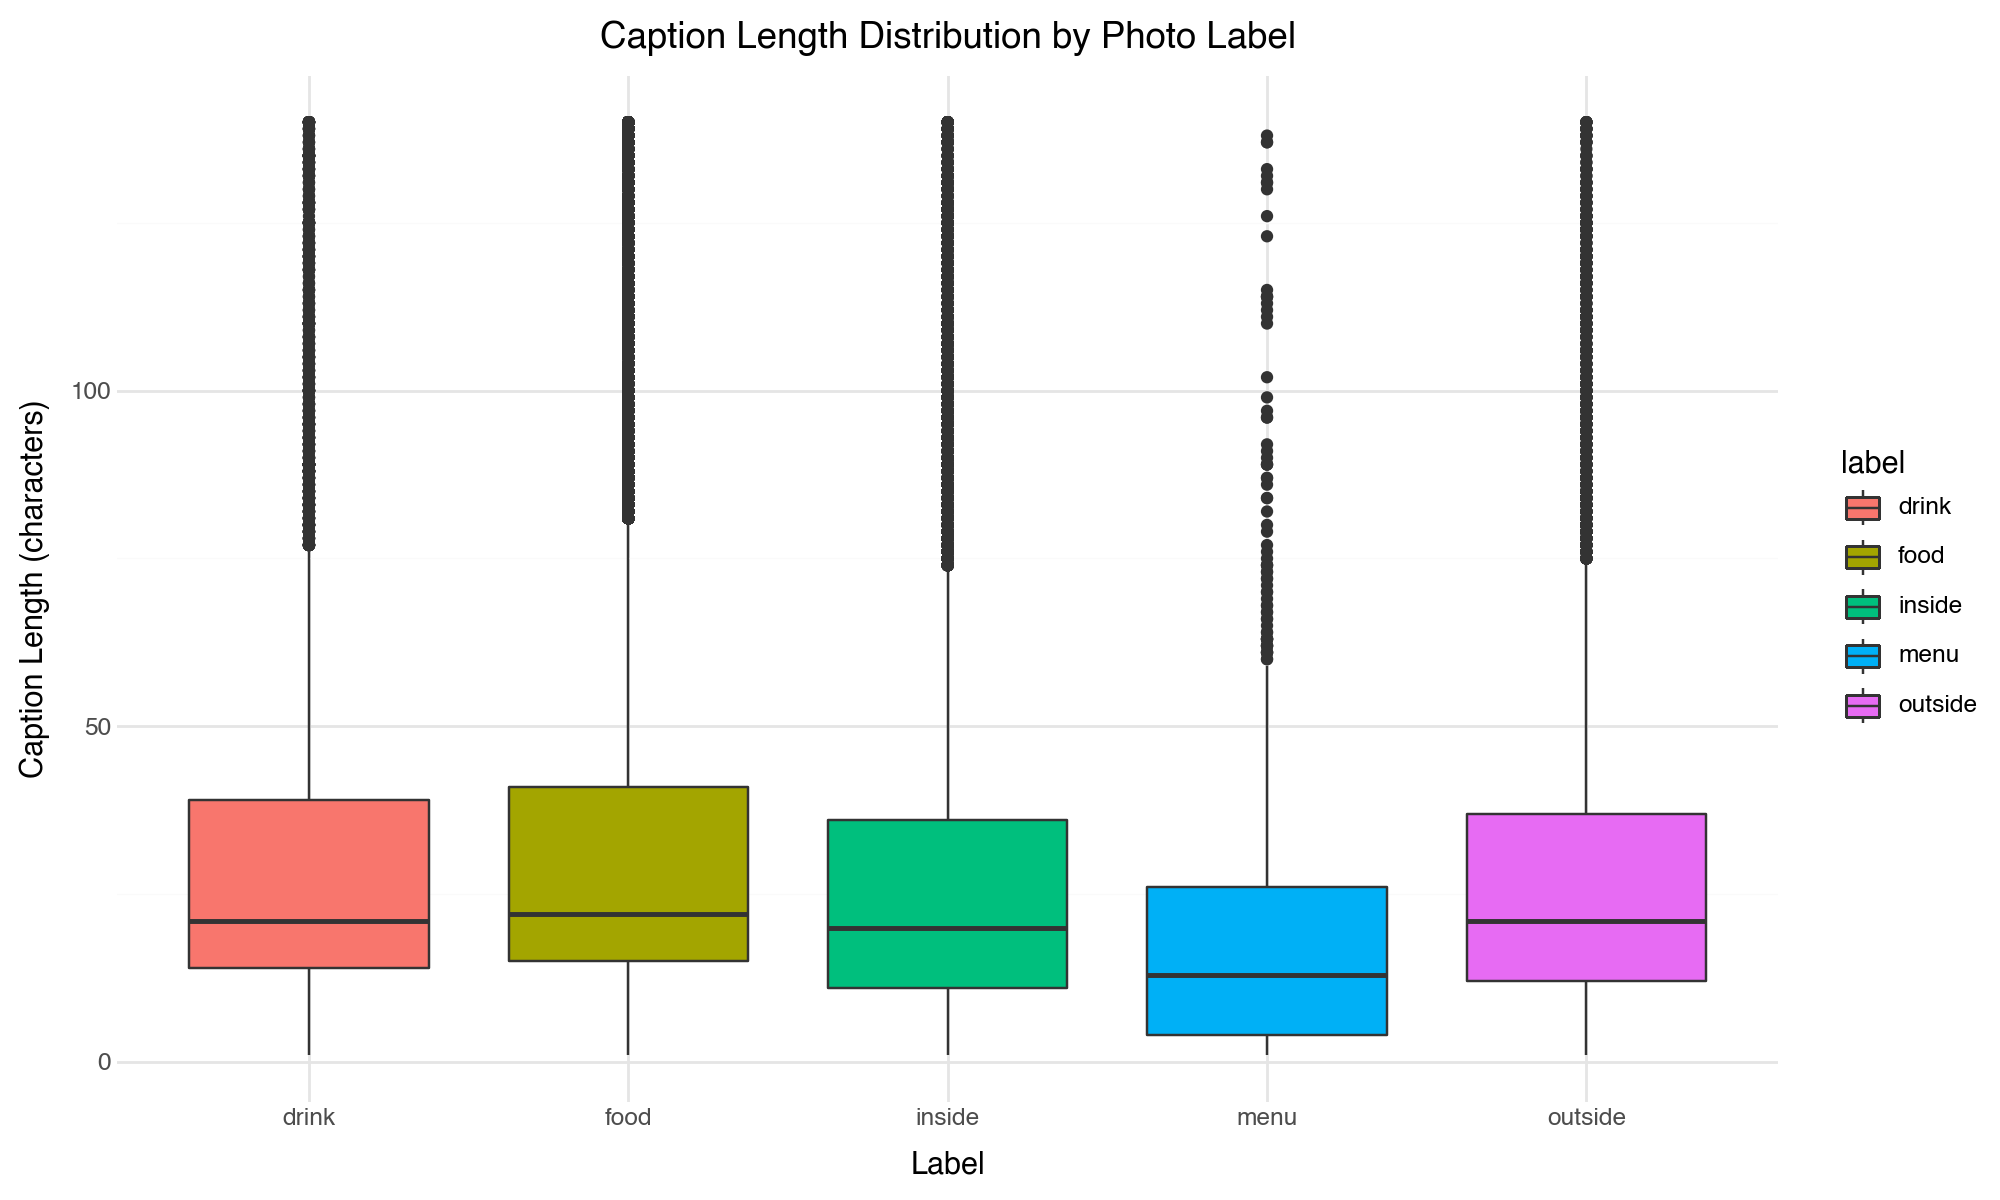

In [21]:
(
    ggplot(df_with_captions, aes(x='label', y='caption_length', fill='label')) +
    geom_boxplot() +
    labs(title='Caption Length Distribution by Photo Label', 
         x='Label', 
         y='Caption Length (characters)') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)


Word Count Statistics:
count    96734.000000
mean         5.214930
std          4.639877
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         32.000000
Name: word_count, dtype: float64


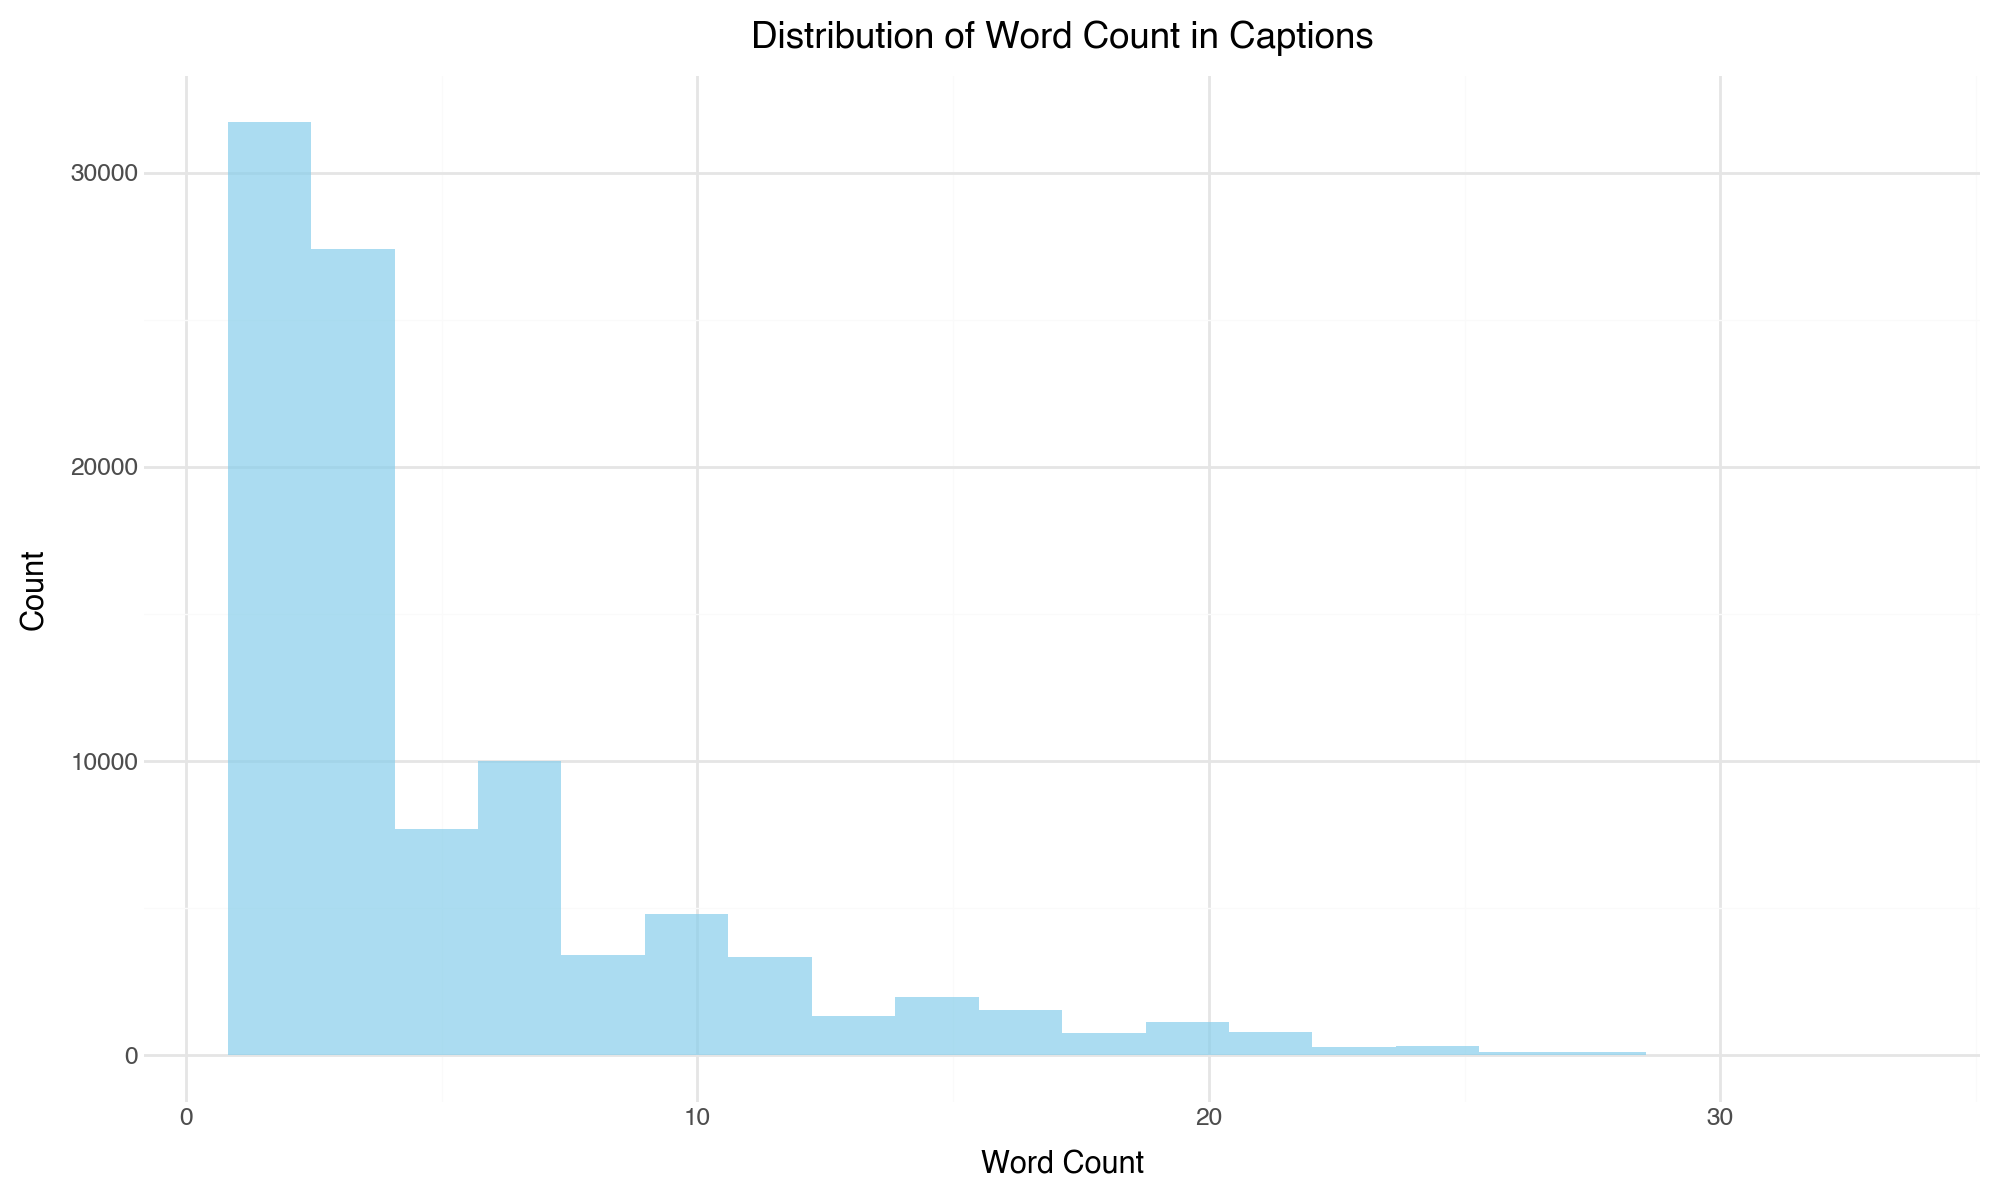

In [22]:
df_with_captions['word_count'] = df_with_captions['caption'].str.split().str.len()

print("\nWord Count Statistics:")
print(df_with_captions['word_count'].describe())

(
    ggplot(df_with_captions, aes(x='word_count')) +
    geom_histogram(bins=20, fill='skyblue', alpha=0.7) +
    labs(title='Distribution of Word Count in Captions', 
         x='Word Count', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

### Common Words in Captions

In [23]:
for label in df['label'].unique():
    label_captions = df_with_captions[df_with_captions['label'] == label]['caption']
    label_words = []
    
    for caption in label_captions:
        words = re.findall(r'\b[a-z]{2,}\b', caption.lower())
        label_words.extend(words)
    
    top_words = Counter(label_words).most_common(10)
    
    print(f"\n{label.upper()}:")
    for word, count in top_words:
        print(f"  {word}: {count}")


OUTSIDE:
  the: 2200
  of: 856
  outside: 796
  view: 650
  in: 612
  and: 579
  patio: 571
  front: 544
  from: 510
  on: 483

FOOD:
  and: 9578
  with: 6841
  the: 5396
  chicken: 4838
  of: 2826
  cheese: 2609
  salad: 2436
  shrimp: 2133
  fried: 1889
  in: 1847

INSIDE:
  the: 5927
  bar: 2953
  and: 2608
  of: 2075
  area: 1792
  inside: 1635
  dining: 1485
  at: 1390
  in: 1323
  room: 1321

MENU:
  menu: 566
  the: 90
  and: 73
  of: 56
  new: 52
  to: 40
  for: 32
  page: 27
  is: 26
  on: 25

DRINK:
  the: 1016
  and: 920
  of: 516
  with: 502
  tea: 403
  iced: 403
  coffee: 314
  beer: 306
  espresso: 302
  for: 295


         word  count
0     chicken   4953
1         bar   3511
2      cheese   2717
3       salad   2505
4      shrimp   2170
5        area   2056
6       fried   1923
7      inside   1865
8      dining   1681
9   chocolate   1621
10      great   1584
11       roll   1584
12      pizza   1574
13       pork   1476
14   sandwich   1425
15       cake   1425
16     burger   1418
17    grilled   1409
18       good   1406
19       room   1397


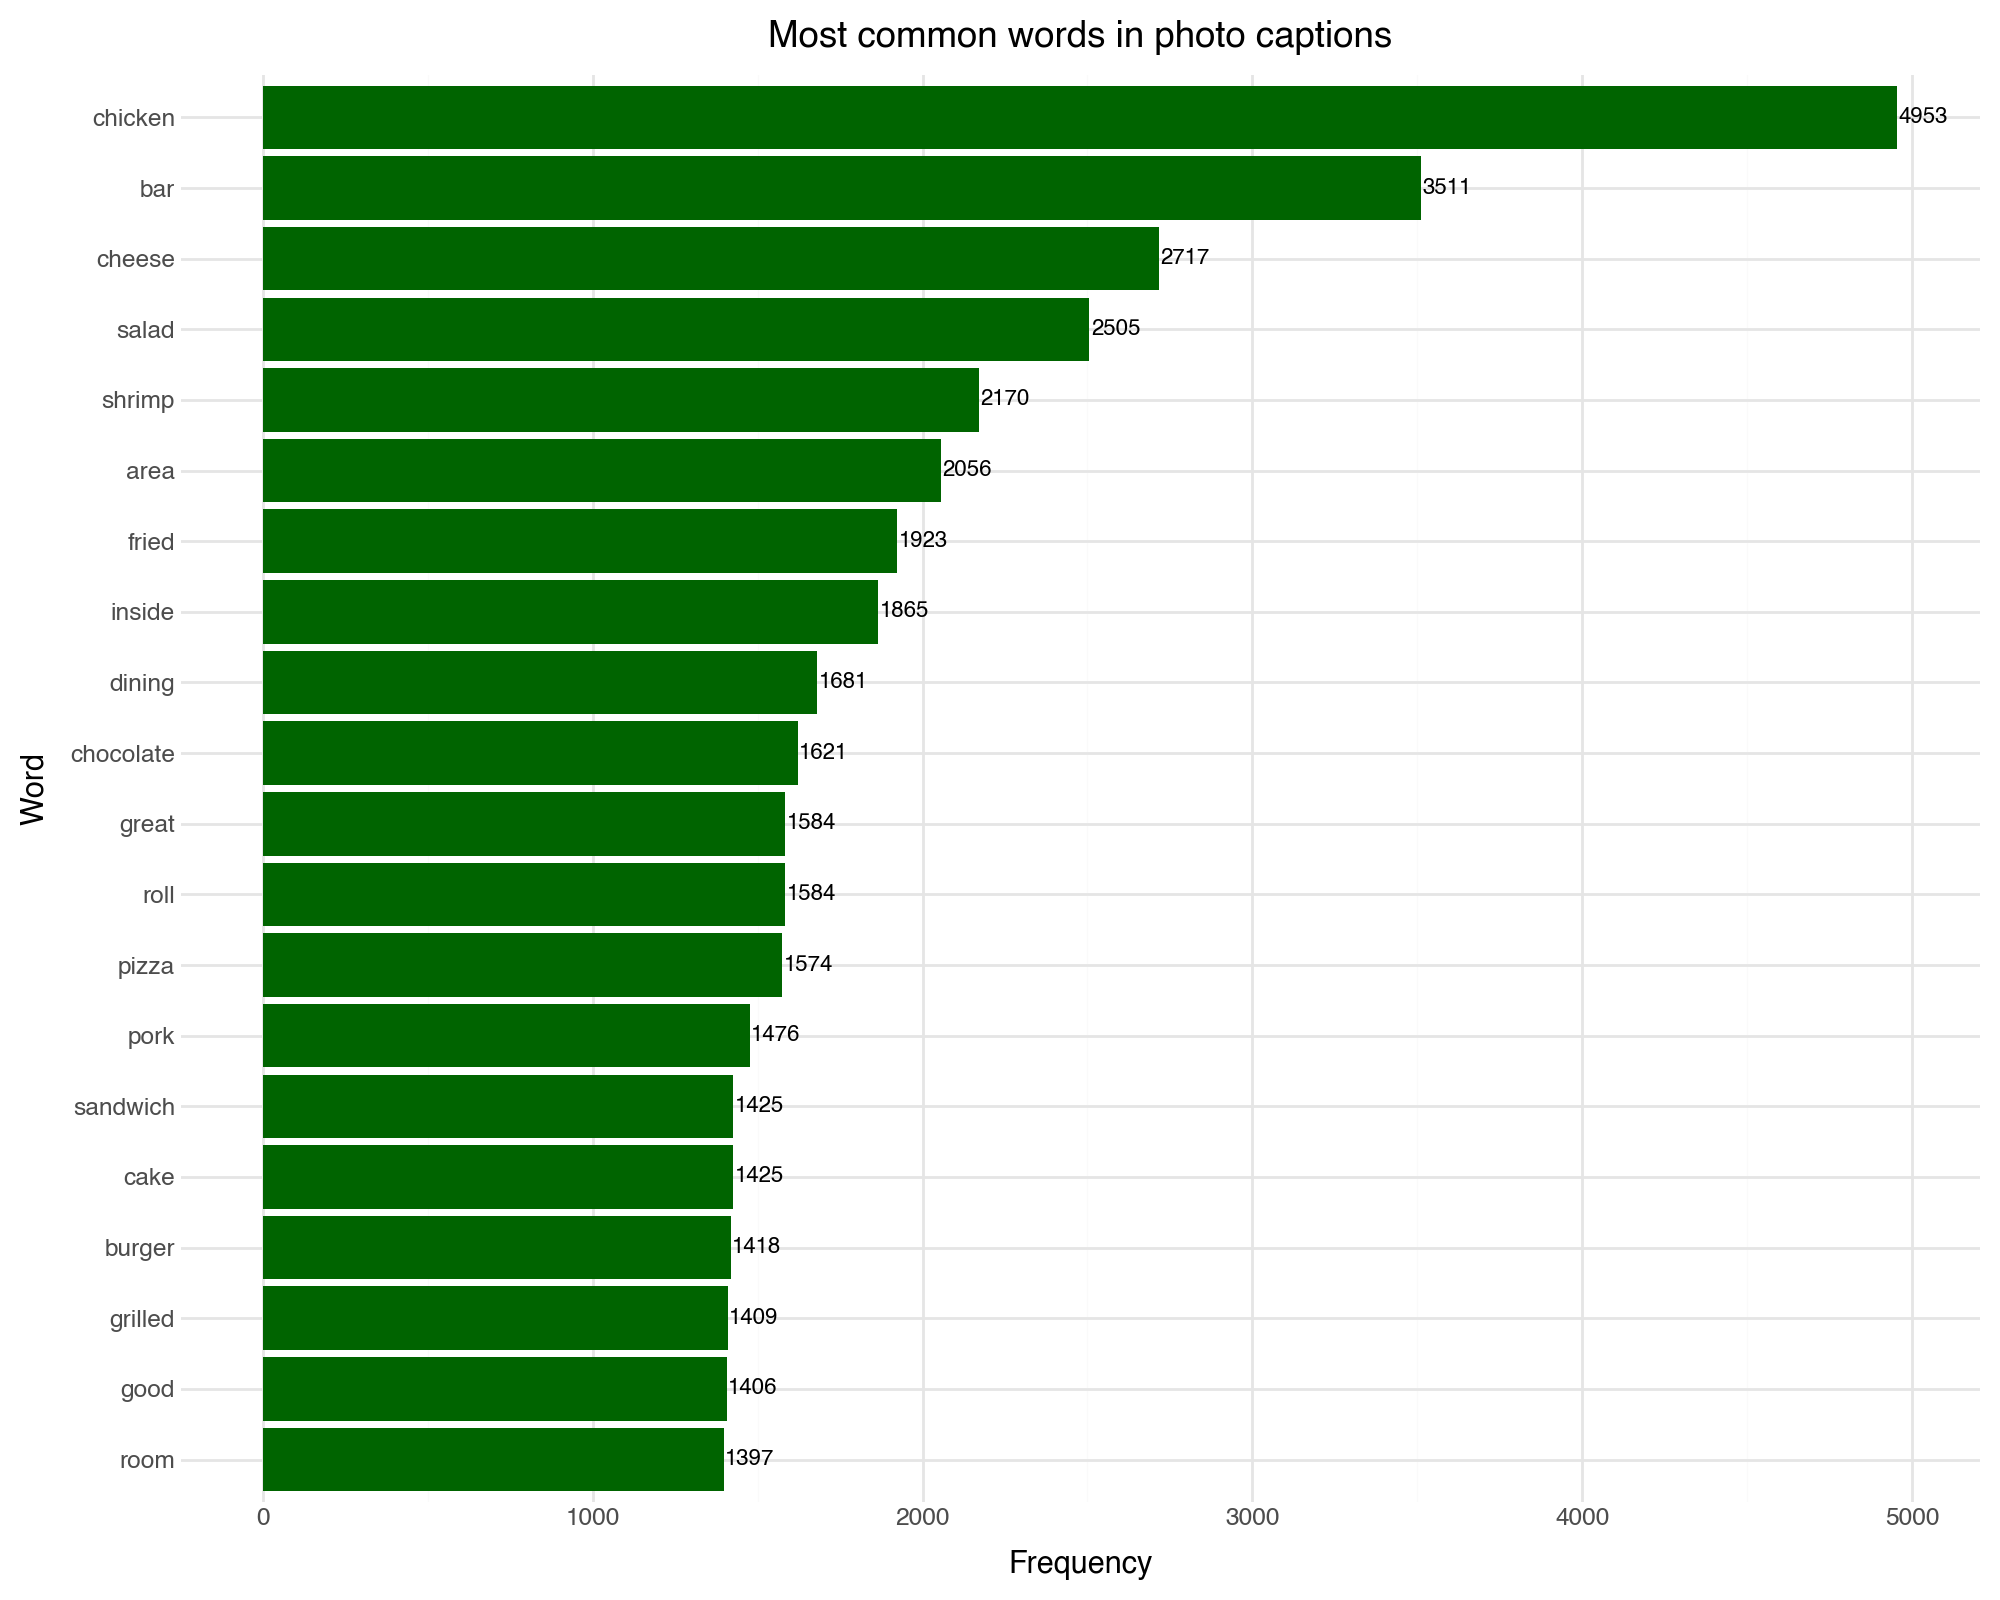

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

all_words = []
for caption in df_with_captions['caption']:
    words = re.findall(r'\b[a-z]{2,}\b', caption.lower())
    filtered_words = [word for word in words if word not in stop_words]
    all_words.extend(filtered_words)

word_counts = Counter(all_words).most_common(20)
word_freq_df_filtered = pd.DataFrame(word_counts, columns=['word', 'count'])
print(word_freq_df_filtered)

(
    ggplot(word_freq_df_filtered, aes(x='reorder(word, count)', y='count')) +
    geom_bar(stat='identity', fill='darkgreen') +
    geom_text(aes(label='count'), ha='left', nudge_y=5, size=8) +
    coord_flip() +
    labs(title='Most common words in photo captions', 
         x='Word', 
         y='Frequency') +
    theme_minimal() +
    theme(figure_size=(10, 8))
)